# **Asignatura**: Aprendizaje Automático

**Práctica 1**: Aprendizaje supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 28 de Marzo de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>Abelardo Fernández Campo</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Problema de clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar sistemas olfativos de Inteligencia Artificial mediante **narices electrónicas (*e-Nose*)**, capaces de determinar la calidad de una muestra de carne en base a los gases emitidos por la misma. El conjunto de datos se obteniene a partir de la investigación realizada en el siguiente artículo:

- Feyzioglu, A.; Taspinar, Y.S. Beef Quality Classification with Reduced E-Nose Data Features According to Beef Cut Types. Sensors 2023, 23, 2222 (URL: <a href="https://www.mdpi.com/1424-8220/23/4/2222">https://www.mdpi.com/1424-8220/23/4/2222</a>)



## Contexto y motivación del problema

Los controles de calidad alimentarios son un conjunto de procedimientos y normativas que se implementan para asegurar que los alimentos sean seguros, saludables y cumplan con los estándares establecidos. Esto incluye la supervisión de la producción, el procesamiento, el almacenamiento y la distribución de los alimentos.

Los controles de calidad pueden abarcar desde la inspección de las materias primas hasta la evaluación del producto final, asegurando que no haya contaminantes y que se mantengan las propiedades nutricionales. Normalmente, el proceso de control de calidad conlleva la toma de muestras de alimentos, su transporte a un laboratorio, la realización de diferentes análisis químicos sobre el alimento y la generación de informes positivos o negativos.

Como alternativa a este proceso, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **sistemas olfativos electrónicos (*e-Noses*)** sensibles a los gases que pueden generar diferentes alimentos frescos o en descomposición. En particular, **nos crentraremos en la clasificación de la calidad de cortes de carne** haciendo uso de diferentes gases generados durante el proceso de descomposición de la misma.

Una **e-Nose** (*nariz electrónica*) es un dispositivo diseñado para detectar y analizar olores de manera similar a como lo hace el sentido del olfato en los seres humanos. Utilizan sensores químicos que pueden identificar diferentes compuestos volátiles en el aire (gases).

Estos dispositivos son muy útiles en diversas aplicaciones, como en la industria alimentaria para controlar la calidad de los productos, en la detección de contaminantes en el medio ambiente, o incluso en la medicina para identificar enfermedades a través del análisis de olores específicos.

La tecnología detrás de las narices electrónicas puede variar. En general, combinan sensores, algoritmos de procesamiento de datos y aprendizaje automático para interpretar los olores y proporcionar información útil.

<center>
<img src="https://cdn.open-pr.com/V/5/V505414311_g.jpg" />
</center>

## El conjunto de datos

El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS">https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS</a>.


Se trata de un conjunto de datos que contiene 12 tipos de cortes de carne diferentes (redondo, solomillo superior, filete de lomo, carne de aleta, lomo corto, falda, terrón, carne de falta, interior/exterior, costillas, espinilla y grasa). Los cortes fueron monitorizados durante 37h hasta su deterioro utilizando 11 tipos de sensores de gas distintos. En cada medición, se asignó una categoría del estado de la carne con 4 etiquetas indicando la calidad "excelente", "buena", "aceptable" y "estropeada".


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de clasificar el estado de una muestra de carne, independientemente de su tipo de corte, partiendo de los datos proporcionados por cada uno de los sensores. El modelo de decisión para determinar el estado de la carne a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar ha sido preprocesado y extraído a partir de los datos originales, y tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de medición de cada tipo de sensor de gas (en total 11 tipos distintos).
- **Datos de salida (Y)**: Clasificación del tipo de carne.


El conjunto de datos a usar en la práctica se encuentra accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [171]:
import pandas as pd

path_to_data_classification= 'https://www.dropbox.com/scl/fi/3zmizfgjfz5xbbr7xcn2x/MeatClassification.csv?rlkey=81gz5xipne04whrniwqc40r21&st=7o73a6qs&dl=1'

df= pd.read_csv(path_to_data_classification)
df.head(5)


,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

# 1.Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.





##1.1 Breve análisis descriptivo

Comenzamos con el conjunto de datos ya cargado desde el enlace proporcionado utilizando la librería pandas, y usamos df.head() como una pequeña visualización de los datos. Se puede notar que el conjunto de datos contiene columnas que representan los valores de distintos sensores (MQ135, MQ136, MQ137, MQ138, MQ2, MQ3, MQ4, MQ5, MQ6, MQ8 y MQ9), junto con dos columnas adicionales: 'Cut', que indica el tipo de corte de la carne, y 'Label', que señala la calidad de la muestra (clase objetivo). Esta revisión inicial facilita la identificación de los tipos de datos (numéricos y categóricos) y ayuda a detectar si existen identificadores innecesarios, estableciendo una base sólida para las transformaciones y el preprocesamiento posteriores. Como nos menciona en el enunciado, voy a centrarme en los valores de los sensores, dejando un poco de lado la columna 'Cut', la cuál no consideraré.

##1.2 Ánalisis exploratorio de los datos

Para empezar el análisis exploratorio, buscamos primero unas estadísticas descriptivas del dataset utilizando el método df.describe(), lo que nos mostrará la media, la desviación estándar, los percentiles y otros valores importantes para las variables numéricas. Esto me va a ayudar a conocer el rango de los sensores, detectar posibles valores extremos y entender la dispersión de los datos.

También es muy útil visualizar las distribuciones de cada sensor. Crearé histogramas para ver cómo se distribuyen los datos y boxplots para identificar outliers (los trataré más adelante) de cada sensor, usando seaborn y matplotlib.

Además, es fundamental analizar la variable objetivo. En este problema de clasificación multiclase, por ejemplo, si tenemos etiquetas como 'Excellent', 'Spoiled', 'Good' o 'Acceptable' , debemos explorar su distribución mediante un conteo de valores (por ejemplo, usando value_counts() de pandas) y visualizarlo con un gráfico de barras para comprobar si existe un balance o desbalance entre las clases (que uno de los valores de la clase sea mucho más común que el resto).

Finalmente, se debe calcular y visualizar la matriz de correlación para detectar relaciones fuertes entre los sensores o entre estos y la variable objetivo. Utilizar un heatmap de seaborn, permitirá identificar rápidamente redundancias o relaciones que pueden influir a la predicción de los modelos. Esto me ayudará a decidir, en pasos posteriores, si es necesario eliminar variables redundantes o aplicar técnicas de reducción de dimensionalidad.
También usaré la librería numpy para ciertos cálculos.

El código que se encargará de realizar todo lo mencionado es el siguiente:

             MQ135        MQ136        MQ137        MQ138          MQ2  \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000   
mean     12.867592     8.653604    16.154671    12.335779     6.928496   
std       2.828903     6.989394     5.454674     2.669185     1.560192   
min       8.030000     2.780000     3.160000     7.700000     3.870000   
25%      10.570000     5.250000    13.040000    10.310000     5.720000   
50%      12.920000     6.800000    17.000000    12.050000     6.750000   
75%      14.400000     8.070000    19.930000    13.820000     7.490000   
max      20.510000    39.030000    28.670000    19.910000    12.640000   

               MQ3          MQ4          MQ5          MQ6          MQ8  \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000   
mean     14.679063     6.528142    15.001271    16.379921    35.730154   
std       3.434043     3.498708     5.015889     6.164918     6.735156   
min       7.880000     2.230000     5

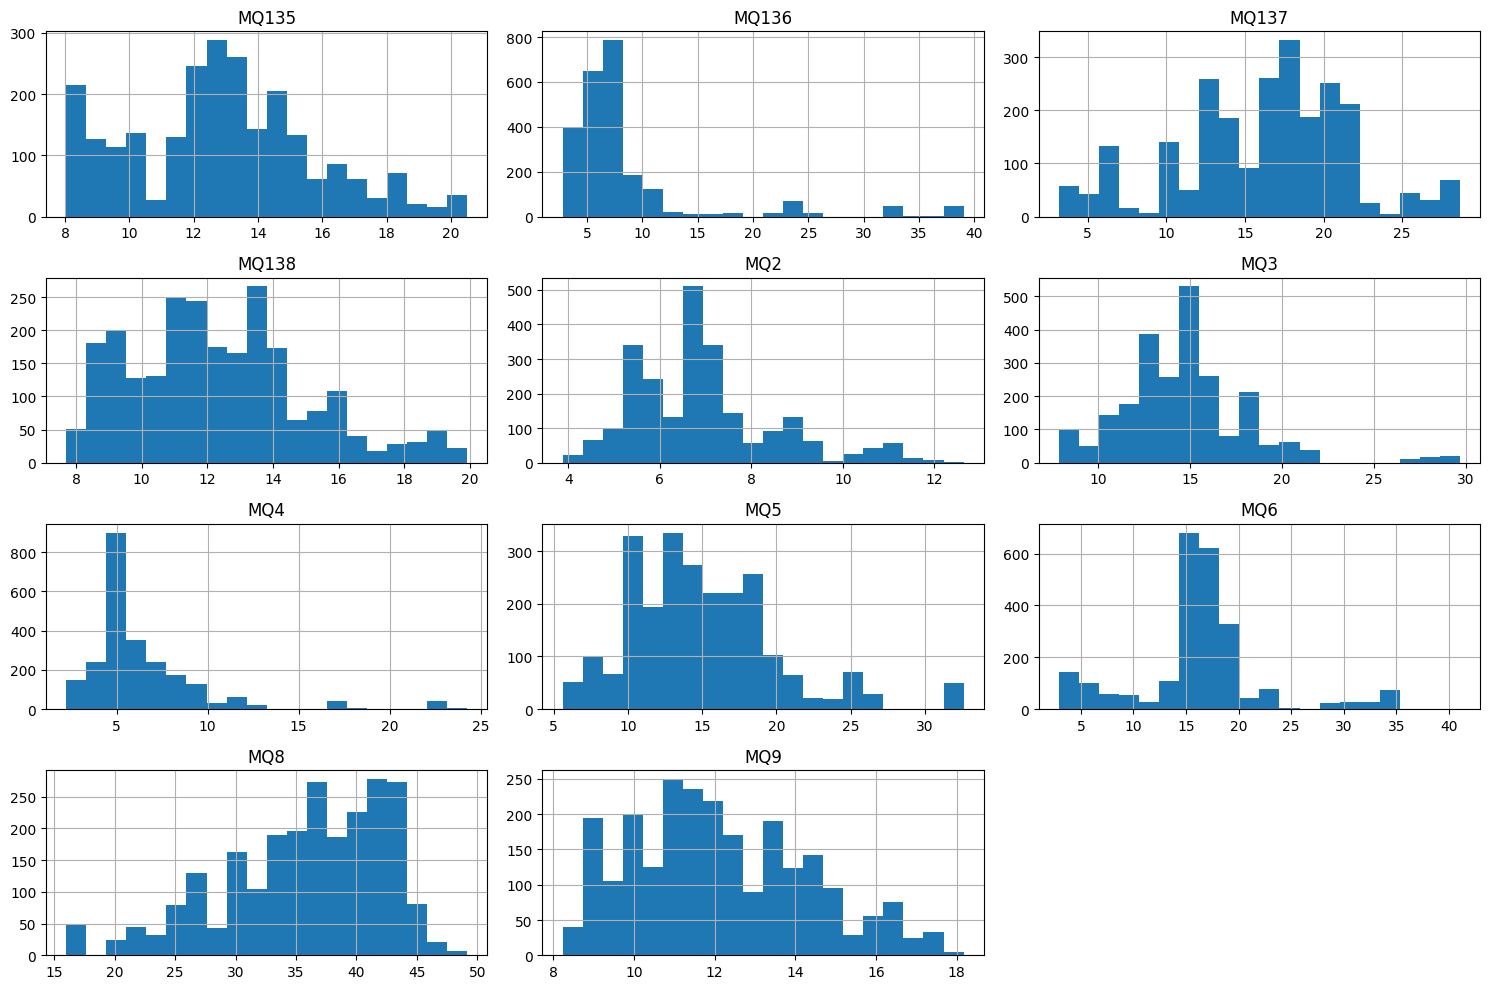

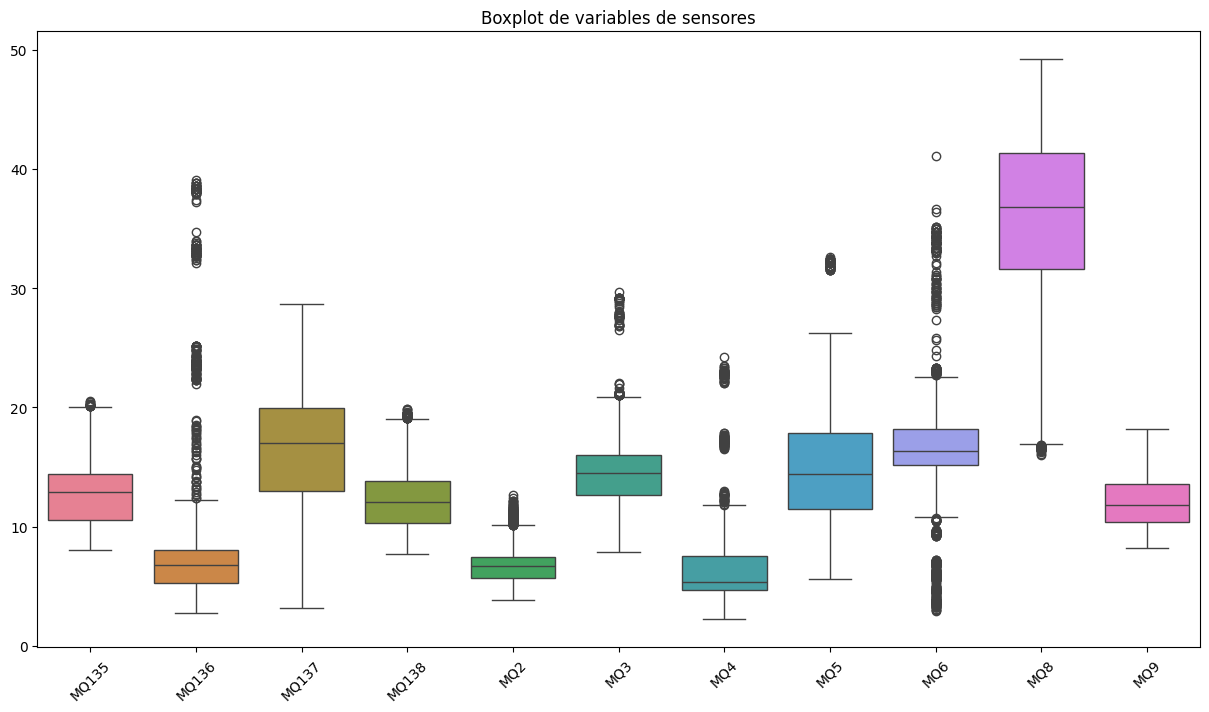

Label
Excellent     600
Spoiled       600
Acceptable    600
Good          600
Name: count, dtype: int64


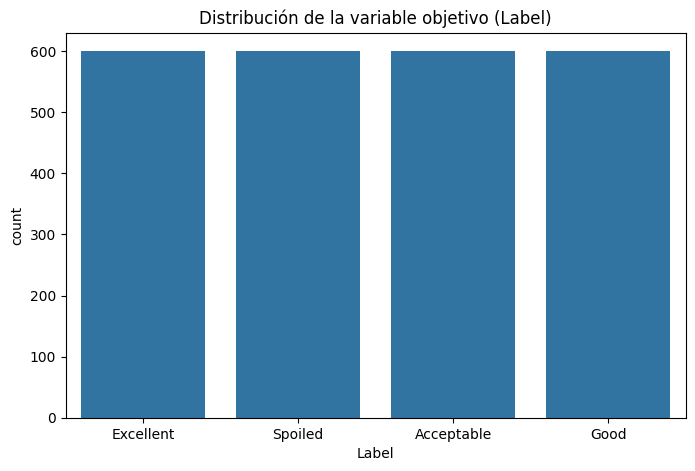

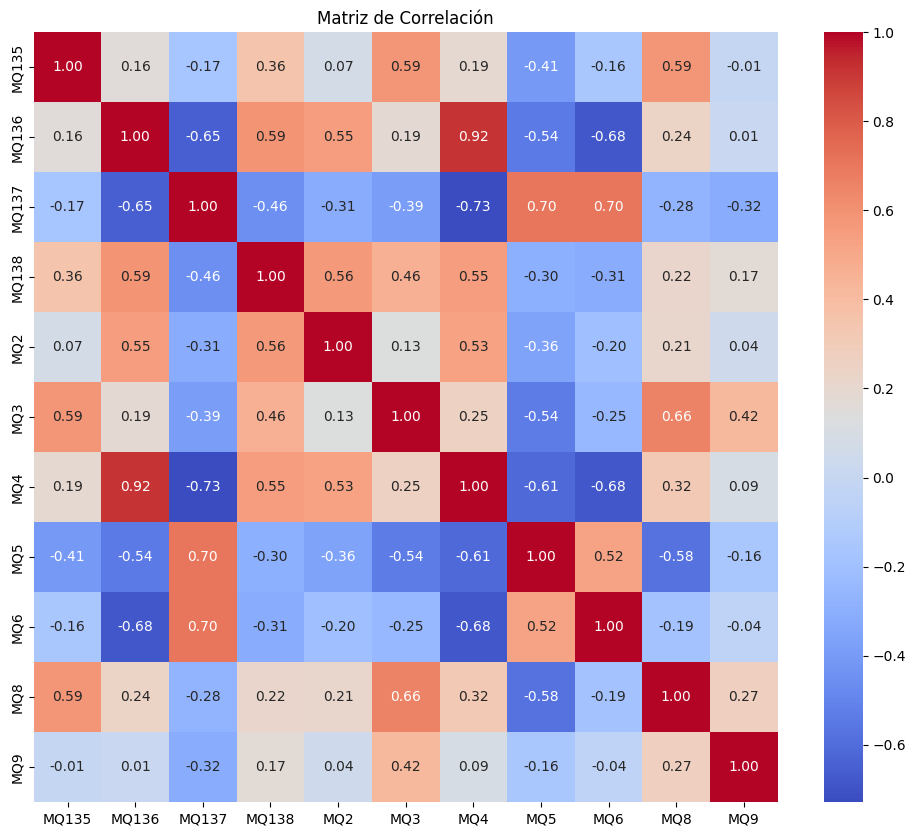

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Estadísticas descriptivas
print(df.describe())

#Histogramas para cada sensor, estudiando el desbalance
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

#Boxplots para visualizar outliers de cada sensro
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[[col for col in df.columns if col.startswith('MQ')]])
plt.xticks(rotation=45)
plt.title("Boxplot de variables de sensores")
plt.show()

#Análisis de la variable objetivo
print(df['Label'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
plt.title("Distribución de la variable objetivo (Label)")
plt.show()

#Matriz de correlación entre variables numéricas y eliminamos la variable categórica, para evitar problemas
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


El df.describe() nos deja ver que para cada uno de los sensores se cuentan 2400 observaciones. Además, se muestran la media, la desviación estándar y los valores mínimo y máximo, entre otros, lo que me da una visión general del rango en el que se mueven los datos y me permite intuír la presencia de posibles valores extremos.

Gracias a los histogramas de cada uno de los sensores, observamos cómo se distribuyen las mediciones. Vemos que algunos sensores presentan distribuciones más sesgadas (con mucha concentración en rangos específicos) mientras que otros muestran una dispersión más amplia. Esto nos indica la heterogeneidad en el comportamiento de los distintos gases medidos, de cara a una posible selección de características.

Los boxplots nos confirma la presencia de outliers, los cuales trataremos en un punto más adelante.

En el gráfico de barras vemos la distribución de la variable objetivo, y nos damos cuenta de que está completamente balanceada, por lo que no debemos considerar ningún tipo de balanceo de clase.

Por último, en el heatmap de la matriz de correlación identificamos relaciones más o menos fuertes entre algunos sensores, lo que nos permitirá realizar distintas pruebas a la hora de seleccionar cuales son los sensores más importantes en la selección de características.

Aunque esto resulte un poco redundante, ya que profundizaré en cada uno de los apartados, permite tener de una manera rápida y sencilla una visión de nuestro conjunto de datos, lo que me ahorrará tiempo en las siguientes decisiones.

#2. Preprocesado de datos

## 2.1 Tratamiento de valores nulos

Este paso consiste en detectar si existen datos faltantes en alguna de las columnas del conjunto de datos. Esto se consigue fácilmente utilizando la función df.isnull().sum(), que nos indica, para cada columna, el número de valores nulos que contiene. Si se encuentran valores nulos, tocaría decidir si eliminarlos o imputarlos, en mi opinión, lo mejor en este caso que no es un conjunto de datos enorme es imputarlos, ya sea con media, moda, etc.

El siguiente código realizará la comprobación ya descrita:

In [173]:
#Comprobamos si existen valores nulos en el conjunto de datos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
MQ135    0
MQ136    0
MQ137    0
MQ138    0
MQ2      0
MQ3      0
MQ4      0
MQ5      0
MQ6      0
MQ8      0
MQ9      0
Cut      0
Label    0
dtype: int64


Como observamos, no existen valores nulos en nuestro conjunto de datos, por lo que este apartado en este caso ha sido breve, pero no por eso pierde importancia

##2.2 Detección y tratamiento de outliers

En el análisis exploratorio se observaron valores extremos mediante boxplots, lo que nos permitió identificar que en varias variables aparecen puntos alejados de la distribución central. Una técnica común es utilizar el rango intercuartílico (IQR). Es decir, para cada variable se calcula el primer cuartil (Q1) y el tercer cuartil (Q3), y el IQR es Q3 − Q1. Cualquier valor menor que Q1 − k·IQR o mayor que Q3 + k·IQR donde k suele ser 1.5, aunque en algunos casos se puede usar más, en este caso, lo representaré con 2.5, para ver si la cantidad de outliers es un poco menor, ya que en el análisis exploratorio salieron demasiados en algún sensor con 1.5.

Para tratar estos valores extremos, aplicamos una técnica de “capado”, que consiste en reemplazar los valores por los límites inferior y superior. De este modo, en lugar de eliminar datos, se limita su influencia en el modelo. Una vez aplicado este proceso, volvemos a visualizar las distribuciones (por ejemplo, mediante nuevos boxplots) para verificar que los outliers han sido mitigados.

El código que realiza todo esto es el siguiente:

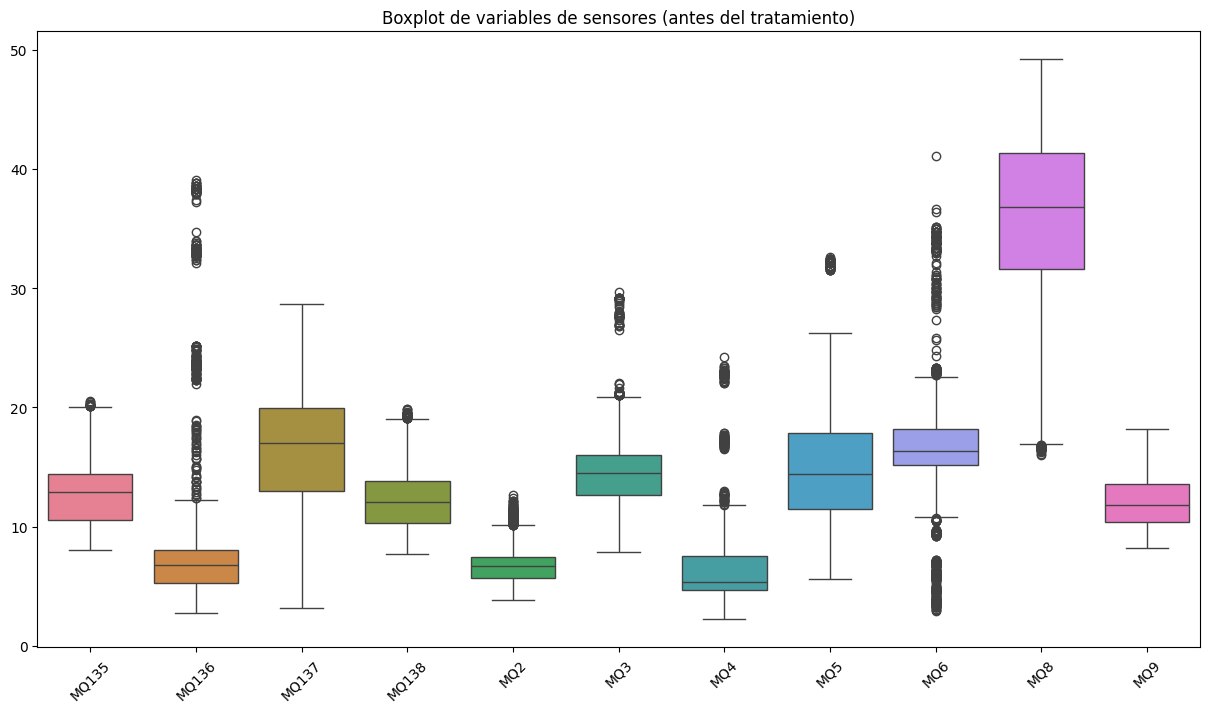

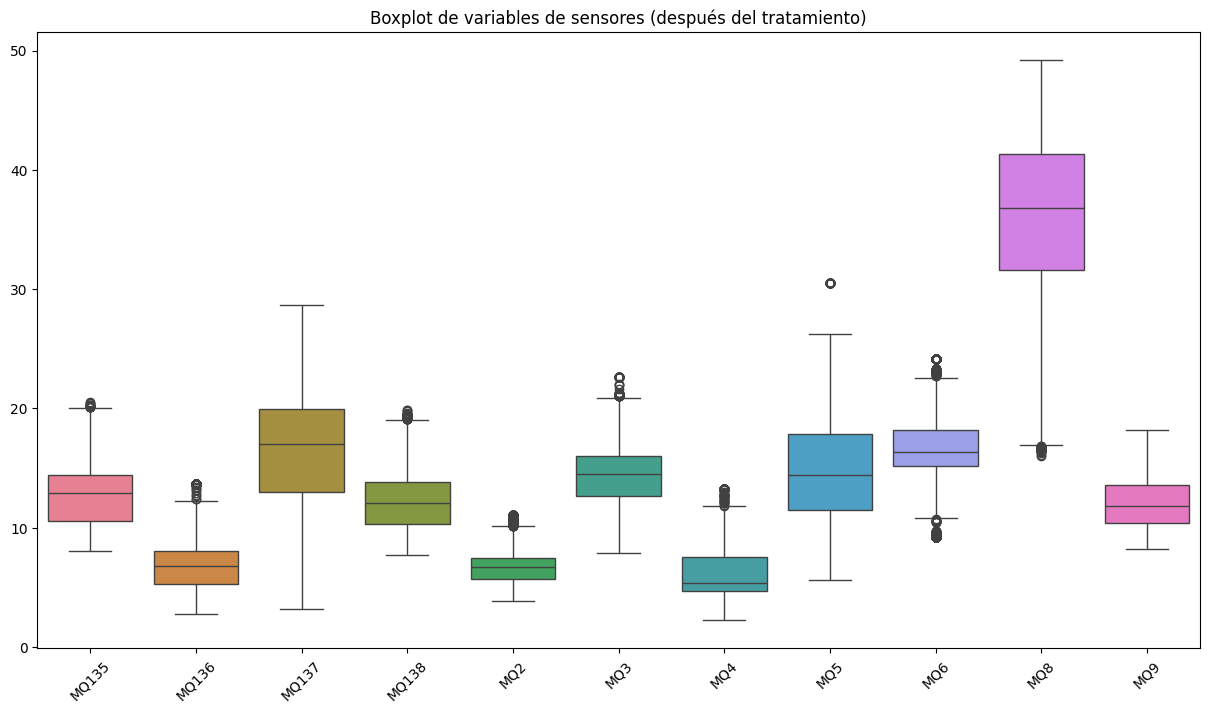

In [174]:
# Visualización inicial de outliers en los sensores
sensor_cols = [col for col in df.columns if col.startswith('MQ')]
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[sensor_cols])
plt.xticks(rotation=45)
plt.title("Boxplot de variables de sensores (antes del tratamiento)")
plt.show()

# Aplicar winsorización a cada columna de sensor usando k = 1.5
for col in sensor_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    # Reemplazamos los valores menores que el límite inferior y mayores que el límite superior
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Visualización posterior para confirmar el tratamiento de outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[sensor_cols])
plt.xticks(rotation=45)
plt.title("Boxplot de variables de sensores (después del tratamiento)")
plt.show()

Tras aplicar el capado, observamos un cambio notable en los boxplots. En la imagen “antes del tratamiento”, se aprecian puntos atípicos muy alejados del cuerpo principal de la distribución en varias variables (especialmente MQ8, y en menor medida MQ5, MQ3, etc.). Después de aplicar el capado, estos valores se han “recortado” a un rango más razonable, de modo que los boxplots muestran distribuciones menos dispersas y con menos puntos aislados.

Esta reducción de outliers extremos ayudará a los modelos que entrenaré más adelante, por lo que de aquí en adelante consideraremos el conjunto de datos tratado.

##2.3 Selección de características

Esta es una etapa fundamental para garantizar que el modelo de aprendizaje automático trabaje con las variables más relevantes, evitando redundancias y ruido innecesario. En este caso en concreto, no contamos con un gran conjunto de características (otros dataset pueden tener muchas más), lo que quita un poco de relevancia, pero aún así vamos a analizar en profundidad y dictar la mejor selección de características posible. En el análisis exploratorio de datos ya hice un pequeño repaso de esto con el heatmap, pero ahora entraremos más en detalle.

###2.3.1 Correlación con la variable objetivo

Como la variable objetivo (“Label”) es categórica, no es tan sencillo calcular una correlación directa como en un problema de regresión. La opción que utilizaré consiste en transformar la etiqueta a valores numéricos (codificándola con .cat.codes de pandas) para poder usar coeficientes de correlación. Esta aproximación, sabiendo que no es perfecta ni mucho menos, puede servir como orientación para saber qué sensores guardan más relación con la etiqueta.
Esto se ve reflejado en el siguiente código:

In [175]:
df['Label_cod'] = df['Label'].astype('category').cat.codes

#Seleccionamos únicamente las columnas de sensores sin contar el corte
sensor_cols = [col for col in df.columns if col.startswith('MQ')]

#Correlación de cada sensor con la etiqueta codificada
correlations_with_label = df[sensor_cols].corrwith(df['Label_cod'])

print("Correlación de cada sensor con la variable objetivo (codificada):")
print(correlations_with_label)

Correlación de cada sensor con la variable objetivo (codificada):
MQ135   -0.164745
MQ136   -0.209609
MQ137    0.359958
MQ138   -0.030545
MQ2     -0.078928
MQ3     -0.253436
MQ4     -0.284470
MQ5      0.421885
MQ6      0.292967
MQ8     -0.178737
MQ9     -0.032050
dtype: float64


Los valores de correlación que vemos con la variable objetivo son relativamente bajas para la mayoría de los sensores, destacando ligeramente MQ137 con un valor positivo alrededor de 0.36. Como es un problema multiclase y la correlación numérica no es el mejor indicador para variables categóricas, por eso, de momento no eliminaré ninguna variable basándome en esta métrica. Hay otros métodos más complejos para realizar esta tarea pero no lo veo conveniente viendo estos resultados, por lo que queda ver la correlación entre las distintas variables entre sí

###2.3.2 Correlación entre sensores

 Creo importante evitar que el modelo reciba variables fuertemente correlacionadas entre sí, es decir, que tienen una influencia muy similar en los datos, ya que esto puede provocar inestabilidad en ciertos modelos y redundancia en los datos. Estableceré un umbral de correlación (0.85) y eliminar una de las dos variables que superen ese umbral.

 El código que estudia esto es el siguiente:

In [176]:
sensor_data = df[sensor_cols]
corr_matrix = sensor_data.corr().abs()

cols_to_drop = set()

for i in range(len(sensor_cols)):
    for j in range(i+1, len(sensor_cols)):
        if corr_matrix.iloc[i, j] > 0.85:
            print(f"Correlación alta entre {sensor_cols[i]} y {sensor_cols[j]}: {corr_matrix.iloc[i, j]:.3f}")
            colname = sensor_cols[j]
            cols_to_drop.add(colname)

sensor_data_reduced = sensor_data.drop(cols_to_drop, axis=1)

print("\nColumnas eliminadas por alta correlación:", cols_to_drop)
print("Columnas finales:", sensor_data_reduced.columns)


Correlación alta entre MQ136 y MQ4: 0.858

Columnas eliminadas por alta correlación: {'MQ4'}
Columnas finales: Index(['MQ135', 'MQ136', 'MQ137', 'MQ138', 'MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ8',
       'MQ9'],
      dtype='object')


Si nos fijamos en el heatmap hecho en el análisis exploratorio de datos vemos que eran los sensores candidatos a tener una alta correlación, pese a que ha bajado un poco gracias al preprocesamiento que hemos ido haciendo, por lo que eliminamos el sensor MQ4, para un conjunto de sensores más correcto para los modelos. Si hubiese todavía demasiados sensores después de este paso (no es el caso), podría optarse por una reducción de la dimensionalidad aplicando alguna técnica como el PCA.
El siguiente paso a realizar es el estudio de normalización y escalado de las variables.

##2.4 Normalización y escalado de variables

Este es un paso crucial en muchos algoritmos, sobre todo aquellos sensibles a las escalas de los datos (por ejemplo, SVM, que es uno de los que tengo pensado aplciar). El objetivo es garantizar que todas las características tengan un rango comparable, evitando que algunas variables con valores muy grandes (o muy pequeños) dominen el proceso de entrenamiento.

La técnica más común es la estandarización, que transforma cada característica para que tenga media 0 y desviación estándar 1. Esto se consigue con la clase StandardScaler de scikit-learn:

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustamos el escalador a los datos (calcula la media y std) y transformamos
sensor_data_scaled = scaler.fit_transform(sensor_data_reduced)

sensor_data_scaled_df = pd.DataFrame(sensor_data_scaled, columns=sensor_data_reduced.columns)
print(sensor_data_scaled_df.describe().round(2))

         MQ135    MQ136    MQ137    MQ138      MQ2      MQ3      MQ5      MQ6  \
count  2400.00  2400.00  2400.00  2400.00  2400.00  2400.00  2400.00  2400.00   
mean      0.00     0.00    -0.00    -0.00    -0.00    -0.00     0.00     0.00   
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min      -1.71    -1.57    -2.38    -1.74    -1.99    -2.19    -1.91    -1.81   
25%      -0.81    -0.71    -0.57    -0.76    -0.78    -0.62    -0.71    -0.29   
50%       0.02    -0.17     0.16    -0.11    -0.11    -0.03    -0.12     0.00   
75%       0.54     0.28     0.69     0.56     0.37     0.47     0.58     0.47   
max       2.70     2.24     2.29     2.84     2.69     2.64     3.17     1.99   

           MQ8      MQ9  
count  2400.00  2400.00  
mean      0.00    -0.00  
std       1.00     1.00  
min      -2.93    -1.80  
25%      -0.62    -0.79  
50%       0.16    -0.15  
75%       0.83     0.69  
max       2.00     2.79  


Tras aplicar la estandarización con StandardScaler, podemos observar en las estadísticas descriptivas que cada sensor ahora presenta una media muy cercana a 0 y una desviación estándar cercana a 1. Esto confirma que el proceso de escalado se ha realizado correctamente y que todas las variables se encuentran en un rango comparable.

A continuación, con los datos ya preprocesados, me centraré en la fase de modelado.

#3. Definición del protocolo de validación experimental

Este apartado se basa en el protocolo de validación experimental que voy a seguir, junto con las métricas de evaluación que usaré para analizar el rendimiento de los modelos.

He dividido el dataset preprocesado en dos partes: entrenamiento (80%) y test (20%), manteniendo la distribución de clases mediante la estratificación. El conjunto de entrenamiento se utiliza para ajustar los modelos y, además, se emplea validación cruzada (por ejemplo, en GridSearchCV) para optimizar los hiperparámetros y estimar de forma robusta el rendimiento. De este modo, la parte de validación queda incorporada en el proceso de ajuste, mientras que el conjunto de test se reserva exclusivamente para evaluar la generalización del modelo una vez finalizado el entrenamiento.

Para medir el rendimiento, utilizaré las siguientes métricas:

Accuracy (Exactitud): Proporción de predicciones correctas sobre el total de casos.

Precision (Precisión): De las muestras clasificadas como positivas para una determinada clase, el porcentaje que realmente pertenece a dicha clase.

Recall (Sensibilidad): De todas las muestras que realmente pertenecen a una clase, el porcentaje que se clasificó correctamente.

F1-Score: La media armónica entre precisión y recall, que equilibra ambas métricas en un solo valor.

Estas métricas, calculadas de forma ponderada en un problema multiclase, me permiten tener una visión detallada del rendimiento del modelo y, además, de cómo se comporta en cada una de las clases. Veo fundamental utilizar este protocolo para evitar problemas como el data snooping, garantizando que la evaluación final se realice con datos nunca vistos durante el proceso de entrenamiento o ajuste.

El siguiente código ilustra la división del conjunto de datos:

In [178]:
from sklearn.model_selection import train_test_split


X = sensor_data_scaled_df
y = df['Label_cod']

#Dividimos el dataset en entrenamiento (80%) y test (20%), utilizando 'stratify=y' para mantener la distribución de clases.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de test:", X_test.shape)


Tamaño del conjunto de entrenamiento: (1920, 10)
Tamaño del conjunto de test: (480, 10)


Así me aseguro de que la validación experimental sea sólida y las métricas obtenidas reflejen realmente la capacidad del modelo para generalizar a nuevos datos. Más adelante, aplicaré los modelos (Naïve Bayes, Random Forest y SVM) y analizaremos sus resultados utilizando las métricas descritas para seleccionar el mejor enfoque para el problema.

#4.Selección y explicación de los modelos



En esta fase de modelado voy a implementar tres algoritmos de clasificación con el objetivo de comparar su desempeño y decidir cuál considero el mejor para este caso. Empezaré con una breve explicación de cada uno:

*  Naïve Bayes
*   Random Forest (el ensemble en este caso)
*  SVM (Support Vector Machine)

:

##4.1 Naïve Bayes

Como ya he explicado, el Naïve Bayes es un clasificador probabilístico que se basa en el teorema de Bayes, aplicando la asunción (naïve) de independencia condicional entre las variables predictoras. Lo he elegido como el primer algoritmo que aplicaré por las siguientes características:

*  Suele entrenarse muy rápido, ya que su cálculo no requiere procesos iterativos complejos y trabaja con estimaciones de probabilidades basadas en la estadística de cada característica.
* Aunque he hecho un preprocesamiento exhaustivo, el Naïve Bayes no se ve tan afectado por la escala de los datos.
* Si bien en la práctica la suposición que hace de que las variables independientes no suele ser real en la práctica, el método puede funcionar de forma sorprendentemente buena en muchos problemas reales.

En este caso he decidido usarlo como un "modelo de referencia", es decir, probablemente (seguro) que no sea el que mejor resultados de, pero en problemas de clasificación suele utilizarse como un primer vistazo de como son los resultados en un inicio, para enfocarse en distintos algoritmos más complejos.



##4.2 Random Forest

El modelo Random Forest es un método ensemble basado en la técnica de bagging. Consiste en entrenar múltiples árboles de decisión sobre subconjuntos aleatorios del conjunto de datos y, posteriormente, combinar sus predicciones (por votación mayoritaria). Este enfoque reduce el problema de sobreajuste que suele tener un árbol individual, aumenta la robustez y mejora la precisión global del modelo. Además, Random Forest permite evaluar la importancia de cada característica, lo que es útil para entender la relevancia de nuestros sensores.
He decidido utilizarlo para aver la eficacia de los árboles de decisión a la vez que estudiar un modelo más complejo y sofisticado con características adicionales.
El único contra que tiene en mi opinion es su posible complejidad dependiendo del conjunto de datos, y de la selección de hiperparámetros que se haga.

##4.3 SVM

Como ya he explicado, el modelo SVM (Support Vector Machine) es un algoritmo de clasificación que se centra en encontrar el hiperplano óptimo que separe las clases de manera clara. Con la ayuda del truco del kernel, SVM puede transformar el espacio de características para capturar relaciones no lineales, lo que me permite abordar problemas en los que la separación entre clases no es evidente en el espacio original.

He decidido utilizar SVM para explorar la capacidad del conjunto de datos de sensores para formar fronteras de decisión que maximicen la separación entre clases (aunque como hemos visto anteriormente tienen una buena separación). Lo que me resulta muy interesante de SVM es su eficacia en espacios de alta dimensión y la posibilidad de ajustar parámetros críticos como el parámetro de penalización y el gamma, lo que me permite afinar el equilibrio entre el sobreajuste y la generalización.

Sin embargo, debo tener en cuenta que una mala selección de estos hiperparámetros puede hacer un mal rendimiento, lo que hace imprescindible realizar una búsqueda exhaustiva y validación cruzada.

#5.Selección y estimación de valores para hiperparámetros

##5.1 Naïve Bayes

En scikit-learn, la implementación más común de Naïve Bayes para variables continuas es GaussianNB. Los parámetros más relevantes son:

*   var_smoothing: Este parámetro añade una pequeña cantidad de varianza al estimador, actuando como una forma de regularización. Un valor mayor de var_smoothing incrementa la robustez ante problemas numéricos y hace que las probabilidades estimadas no sean excesivamente cercanas a 0 o 1.
*   priors: Se puede establecer de forma manual la probabilidad a priori de cada clase. Normalmente, se deja en None para que se calcule a partir de los datos.

Existen otras variantes de Naïve Bayes (BernoulliNB, MultinomialNB, ComplementNB), más indicadas para características discretas (por ejemplo, texto), pero en este caso, al trabajar con datos numéricos de los sensores, GaussianNB creo que es lo adecuado.

**Estrategia de búsqueda de hiperparámetros**

Aunque el número de parámetros a ajustar en el Naïve es menor que en otros algoritmos, voy a explorar diferentes valores de var_smoothing mediante una búsqueda en rejilla (GridSearchCV). No obstante, en muchos casos, los valores por defecto suelen dar buenos resultados, por lo que el ajuste se limita a un rango pequeño de var_smoothing.

También utilizaré validación cruzada, que evalúa qué tan bien generaliza tu modelo a datos no vistos, dividiendo los datos en partes para entrenar y probar en diferentes combinaciones.

Una vez obtenido el mejor valor para var_smoothing, entrenaré el modelo con dicho valor y obtendremos los resultados de este:

Mejores parámetros encontrados: {'var_smoothing': 0.1}
Exactitud en validación cruzada: 0.6531250000000001


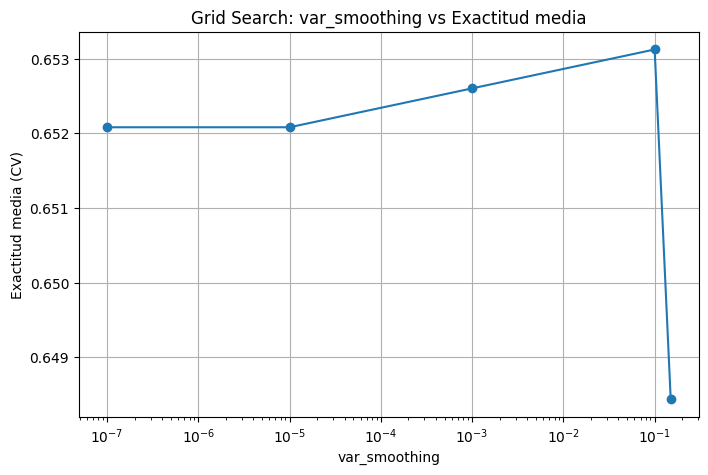

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-7, 1e-5, 1e-3, 1e-1, 0.15]
}

gnb = GaussianNB()

grid_search_gnb = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

#Entrenamos la búsqueda sobre el conjunto de entrenamiento
grid_search_gnb.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search_gnb.best_params_)
print("Exactitud en validación cruzada:", grid_search_gnb.best_score_)

results = grid_search_gnb.cv_results_

var_smoothing_values = results['param_var_smoothing'].data.astype(float)
mean_test_scores = results['mean_test_score']

#Visualizamos la relación entre var_smoothing y la exactitud media
plt.figure(figsize=(8, 5))
plt.plot(var_smoothing_values, mean_test_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('var_smoothing')
plt.ylabel('Exactitud media (CV)')
plt.title('Grid Search: var_smoothing vs Exactitud media')
plt.grid(True)
plt.show()

Como se observa en el gráfico, el mejor valor de var_smoothing es 0.1, obteniendo una exactitud promedio de validación de alrededor del 65.3%. Este resultado proviene únicamente del proceso de entrenamiento y validación cruzada; el siguiente paso será comprobar el desempeño del modelo final (best_gnb) en el conjunto de test independiente y realizar un análisis más detallado de las métricas de evaluación para verificar si este rendimiento se mantiene en datos completamente nuevos.

##5.2 Random Forest

En este caso, la complejidad y cantidad de los parámetros es mucho mayor a la del Naïve Bayes, siendo loos más importantes a considerar en este caso:

*   n_estimators: Número de árboles en el bosque. Más árboles suelen mejorar el rendimiento pero aumentan el tiempo de cómput (demasiado a veces).
* max_depth: Profundidad máxima de cada árbol. Limitar la profundidad ayuda a evitar el sobreajuste.
*  min_samples_split: Número mínimo de muestras requeridas para dividir un nodo, lo que controla la complejidad del árbol.

*   min_samples_leaf: Número mínimo de muestras que debe tener una hoja.

*   max_features: Número de características a considerar al buscar la mejor división (por ejemplo, 'sqrt', 'log2' o None).

Debido a la complejidad del modelo y la interacción entre estos hiperparámetros, realizaré una búsqueda exhaustiva mediante GridSearchCV al igual que antes con validación cruzada de 5 pliegues para identificar la combinación que optimice la exactitud.



Código:






Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros encontrados (Random Forest): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Exactitud en validación cruzada (Random Forest): 0.9994791666666668


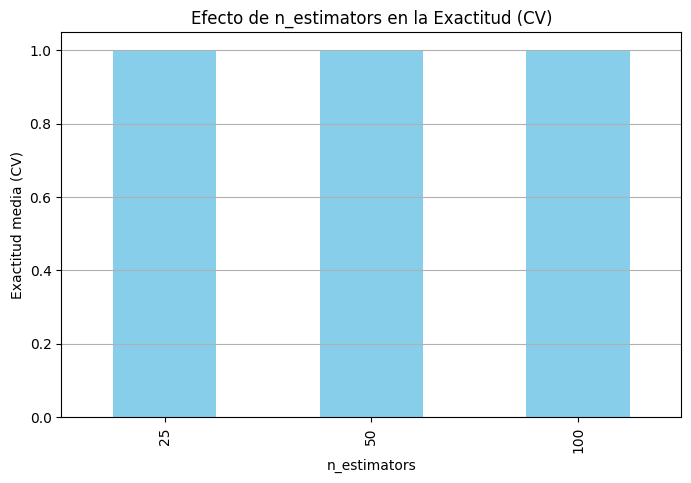

In [180]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 7],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)


grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros encontrados (Random Forest):", grid_search_rf.best_params_)
print("Exactitud en validación cruzada (Random Forest):", grid_search_rf.best_score_)

#Visualización: Efecto de 'n_estimators' en la exactitud promedio
results = pd.DataFrame(grid_search_rf.cv_results_)
grouped = results.groupby('param_n_estimators')['mean_test_score'].mean()

plt.figure(figsize=(8,5))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('n_estimators')
plt.ylabel('Exactitud media (CV)')
plt.title('Efecto de n_estimators en la Exactitud (CV)')
plt.grid(axis='y')
plt.show()


Se puede observar que la configuración final obtenida para el Random Forest produce resultados casi perfectos. La gráfica que agrupa la exactitud media según el valor de n_estimators revela que, tanto con 25, 50 como con 100 árboles, el rendimiento se mantiene prácticamente constante, lo que sugiere que el modelo alcanza un rendimiento casi óptimo incluso con un número moderado de árboles. Este comportamiento es característico del enfoque ensemble, en el que el bagging tiende a estabilizar la predicción, reduciendo el riesgo de sobreajuste.

El resto de parámetros también buscan un rango óptimo, pero los resultados del modelo son demasiado buenos como para indicar que unos son muy superiores a otros, por lo que pasamos a evaluarlo con el conjunto de test para poder determinarlo finalmente.

##5.3 SVM

A diferencia también de Naïve Bayes, en SVM hay que considerar cuidadosamente parámetros como C, gamma y el propio kernel. Esto puede hacer que la complejidad de ajuste sea mayor, pero ofrece la ventaja de modelar fronteras de decisión mucho más complejas.
Los parámetros que considero más relevantes son:


*  kernel: Define la función de transformación que se aplica a los datos para encontrar un hiperplano separador en un espacio. En problemas con separaciones no lineales, se suele utilizar el kernel RBF, aunque en casos lineales puede bastar con el kernel lineal.

* C: Controla la penalización por errores de clasificación. Valores altos de C buscan clasificar correctamente todos los ejemplos, pudiendo llevar al sobreajuste; valores bajos de C dan margen a algunos errores a cambio de una mayor generalización.
*   gamma: Específico del kernel RBF. Controla la influencia de cada ejemplo: valores grandes de gamma hacen que el modelo se “adapte” mucho a ejemplos cercanos, pudiendo sobreajustarse, mientras que valores muy pequeños generan fronteras más suaves y globales.

Una pequeña búsqueda que intenta optimizarlos es la siguiente:


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores parámetros encontrados (SVM): {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Exactitud en validación cruzada (SVM): 1.0


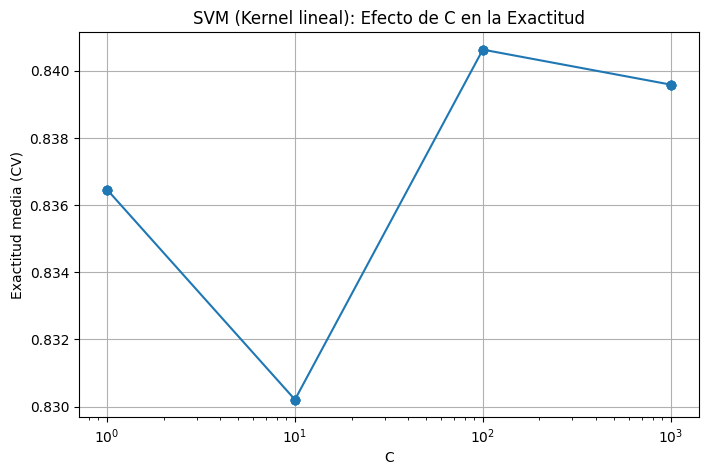

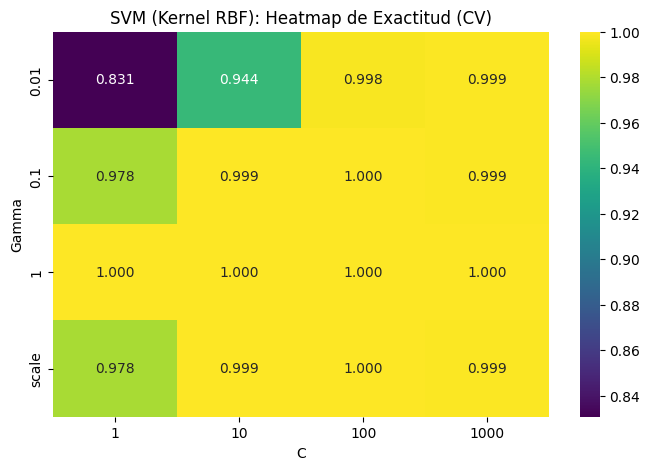

In [181]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': ['scale', 0.01, 0.1, 1]
}

svm = SVC(random_state=42)

grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_svm.fit(X_train, y_train)

print("Mejores parámetros encontrados (SVM):", grid_search_svm.best_params_)
print("Exactitud en validación cruzada (SVM):", grid_search_svm.best_score_)


results_svm = pd.DataFrame(grid_search_svm.cv_results_)

linear_results = results_svm[results_svm['param_kernel'] == 'linear']
plt.figure(figsize=(8, 5))
plt.plot(linear_results['param_C'], linear_results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Exactitud media (CV)')
plt.title('SVM (Kernel lineal): Efecto de C en la Exactitud')
plt.grid(True)
plt.show()

rbf_results = results_svm[results_svm['param_kernel'] == 'rbf']
pivot_rbf = rbf_results.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_rbf, annot=True, fmt=".3f", cmap='viridis')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('SVM (Kernel RBF): Heatmap de Exactitud (CV)')
plt.show()

La gráfica superior nos muestra cómo el kernel lineal incrementa su exactitud a medida que aumenta el valor de C, reflejando que penalizar menos los errores (C más bajo) suele degradar el rendimiento, mientras que C muy altos ajustan mejor los datos, alcanzando su valor máximo en 100. En contraste, el heatmap del kernel RBF indica que existe una combinación de C y gamma (en este caso, C=1 y gamma=1) que logra un 100% de exactitud en validación cruzada. Esto sugiere que los datos presentan cierta no linealidad que el kernel RBF aprovecha con eficacia. Este resultado a igual que con el Random Forest creo que se debe al pequeño tamaño del dataset, lo comprobaremos en el siguiente apartado de evaluación de los modelos en el conjunton de test

#6.Entrenamiento, estimación y discusión de resultados

##6.1 Naïve Bayes



El código que aplica el modelo de Naïve Bayes ya optimizado al conjunto de test, y se calculan las principales métricas de evaluación, así como la visualización de la matriz de confusión, tiene la siguiente implementación:

Exactitud (Accuracy): 0.6729166666666667
Precisión (Precision): 0.6969543783422459
Recall: 0.6729166666666667
F1 Score: 0.6660081477264641

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.52      0.82      0.63       120
           1       0.86      0.79      0.83       120
           2       0.62      0.35      0.45       120
           3       0.79      0.72      0.76       120

    accuracy                           0.67       480
   macro avg       0.70      0.67      0.67       480
weighted avg       0.70      0.67      0.67       480



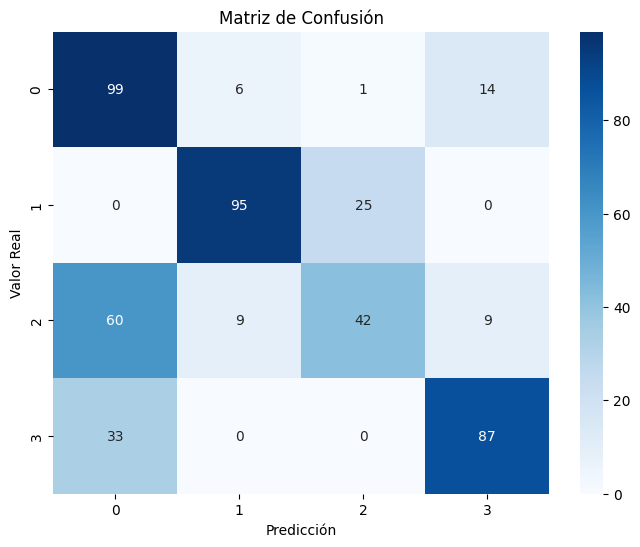

Mapping de clases:
Código 0: Acceptable
Código 1: Excellent
Código 2: Good
Código 3: Spoiled


In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

best_gnb = grid_search_gnb.best_estimator_

#Predicción en el conjunto de test
y_pred_gnb = best_gnb.predict(X_test)

#Cálculo de métricas (usamos "weighted" para promediar en el caso multiclase)
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb, average='weighted')
recall = recall_score(y_test, y_pred_gnb, average='weighted')
f1 = f1_score(y_test, y_pred_gnb, average='weighted')

print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#Informe detallado de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_gnb))

#Visualización de la matriz de confusión
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

label_categories = df['Label'].astype('category').cat.categories
print("Mapping de clases:")
for i, category in enumerate(label_categories):
    print(f"Código {i}: {category}")



Observamos que la exactitud (accuracy) del modelo ronda el 70% en el conjunto de test, lo que implica que 7 de cada 10 muestras son clasificadas correctamente. Además, las métricas de Precisión, Recall y F1-Score se sitúan en torno a 0.70, lo que indica que el modelo mantiene un equilibrio razonable al predecir correctamente la mayoría de las muestras de cada categoría y recuperar la mayoría de los ejemplos de cada clase.

Analizando la matriz de confusión (heatmap), se observa que:

La clase Acceptable (0) se clasifica de manera bastante acertada (92 casos correctos).

La clase Excellent (1) también presenta un alto acierto, aunque con algunas confusiones menores con otras clases.

La clase Good (2) muestra cierta dificultad, dado que se ve confundida en un porcentaje no despreciable con otras categorías.

La clase Spoiled (3) se distingue de forma relativamente buena, aunque también se observan errores donde se predice Spoiled en muestras que son realmente de otra clase y viceversa.

### Conclusión

Como conclusión, el modelo Naïve Bayes demuestra una capacidad aceptable para capturar la información que aportan los sensores, diferenciando de manera eficaz las clases Acceptable y Excellent. Sin embargo, es evidente un solapamiento considerable entre las clases Good y Spoiled, lo que sugiere que los patrones en los valores de los sensores para estas categorías son muy similares. Esta limitación podría estar relacionada con la asunción de independencia entre características que hace Naïve Bayes, lo que dificulta distinguir correctamente cuando los datos de entrada presentan similitudes significativas entre clases. Por ello, aunque el rendimiento global es razonable, sigue siendo interesante explorar otros algoritmos, como haré a continuación.

##6.2 Random Forest


Finalmente, con los parámetros escogidos, evaluámos el modelo:


Resultados del modelo Random Forest en el conjunto de test:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



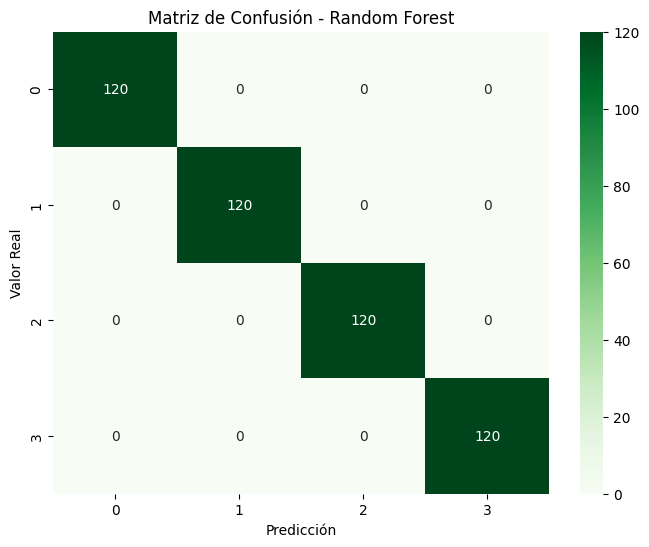

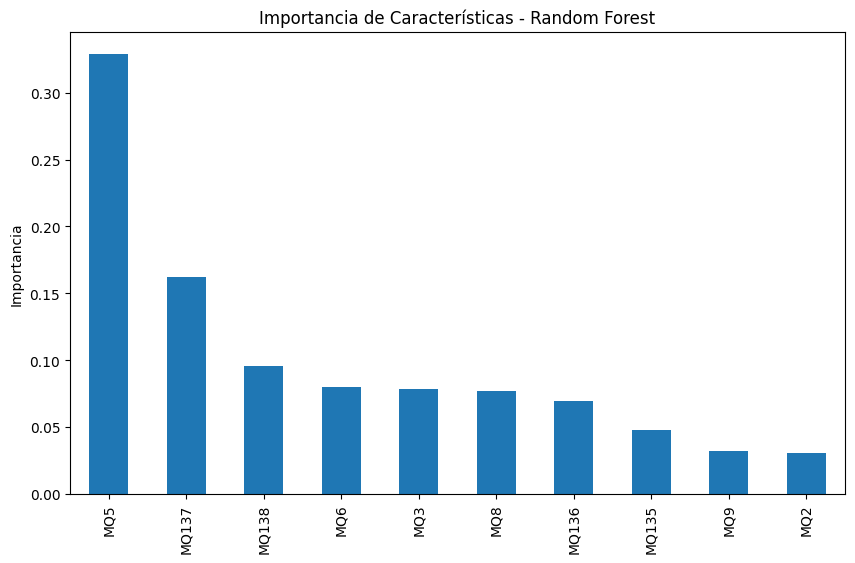

In [183]:
best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nResultados del modelo Random Forest en el conjunto de test:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

importances = best_rf.feature_importances_
feat_importances = pd.Series(importances, index=sensor_data_reduced.columns)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title("Importancia de Características - Random Forest")
plt.ylabel("Importancia")
plt.show()


Este modelo ha alcanzado un rendimiento perfecto en el conjunto de test, con Accuracy, Precision, Recall y F1 Score de 1.0, lo que se refleja en una matriz de confusión sin errores de clasificación para ninguna de las clases. Esto sugiere que, en este dataset, los sensores proveen patrones altamente discriminativos, permitiendo que el algoritmo trace fronteras de decisión de forma impecable. Es importante destacar que el gráfico de importancia de características revela que, en particular, el sensor MQ5 aporta una contribución significativa, lo que indica que algunas variables pueden ser especialmente potentes para diferenciar las clases. Sin embargo, un rendimiento tan bueno confirma que no existan problemas de sobreajuste.

En mi opinión, este resultado se debe a que el dataset no es muy grande, apenas cuenta con menos de 3000 registros, por lo que modelos complejos bien entrenados darán resultados casi perfectos.

### Conclusión

En conclusión, el Random Forest aplicado a este conjunto de datos demuestra una capacidad perfecta para clasificar correctamente todas las muestras, alcanzando una exactitud del 100% en el conjunto de test. Este rendimiento sobresaliente se debe, en gran medida, a la alta separabilidad de las clases proporcionada por los sensores, combinada con la robustez del enfoque de bagging, que reduce el sobreajuste de los árboles individuales, y sobretodo, porque el conjunto de datos es pequeño. Considero que si esto fuese un caso real sería crucial continuar evaluando el modelo para descartar posibles fugas de información y confirmar que el rendimiento perfecto se mantenga en condiciones más generales. Lo más probable es que a medida que pasase el tiempo el modelo no tuviese tanta efectividad con nuevos datos, por lo que debería reajustarse.

##6.3 SVM

La evaluación con los mejores parámetros para este modelo es la siguiente:

=== Resultados del modelo SVM en el conjunto de test ===
Accuracy: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1 Score: 1.0000


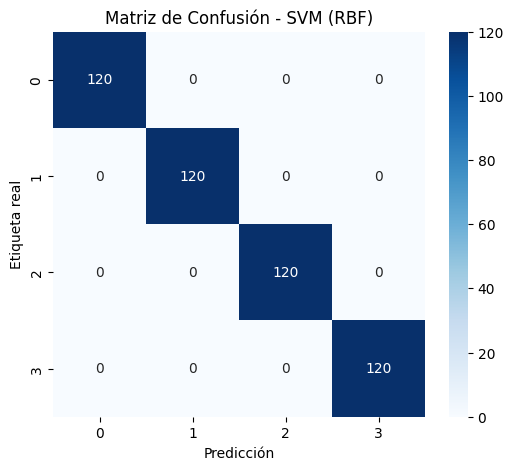

In [184]:
best_svm = SVC(C=1, gamma=1, kernel='rbf', random_state=42)
best_svm.fit(X_train, y_train)

y_pred_svm = best_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("=== Resultados del modelo SVM en el conjunto de test ===")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precisión: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - SVM (RBF)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()


Al igual que el Random Forest ha alcanzado un rendimiento perfecto en el conjunto de test, con Accuracy, Precision, Recall y F1 Score de 1.0, lo que se refleja en una matriz de confusión sin errores de clasificación para ninguna de las clases. En este dataset, los sensores parecen proporcionar patrones altamente discriminativos que permiten al SVM trazar fronteras de decisión impecables (a parte de lo mencionado varias veces del pequeño tamaño). Aunque el SVM no ofrece una “importancia de características” de la misma manera que un Random Forest, este resultado igualmente sugiere que algunos sensores diferencian las clases de manera muy marcada.

Aun así, siempre que un modelo logra resultados tan sobresalientes conviene descartar data leakage y sobreajuste, ya que el tamaño del dataset es relativamente pequeño (menos de 3000 registros). Es posible que el modelo esté “memorizando” los datos con gran precisión, por lo que convendría seguir evaluándolo con nuevos ejemplos o mediante validaciones adicionales para confirmar la robustez de esta exactitud en el caso de ser un modelo real.

# Conclusión

Ya hemos visto el rendimiento de los 3 distintos modelos, el Naïve Bayes pese a ser el peor en resultados, es el más eficiente y rápido de los tres. En mi caso he utilizado el Random Forest como algoritmo de ensemble, el cual tiene un rendimiento perfecto, pero es el más complejo y tardío de ejecutar de los 3. Por último el SVM, que al igual que el anterior consigue un rendimiento perfecto, pero siendo menos costoso que este, por lo que si me tuviese que quedar con uno sería con el SVM.

En conclusión, creo que lo más importante de este problema es percatarse del problema que tenemos, un dataset muy pequeño, lo que nos obliga a reevaluar continuamente los modelos y adaptarlos a los nuevos cambios que surgirían si esto fuese un caso real.

# BIBLIOGRAFÍA UTILIZADA


*   Diapositivas tanto de prácticas como de teoría de la asignatura
*   https://datos.ninja/tutorial/el-analisis-exploratorio-de-datos-definitivo-eda-en-python/#%C2%BFComo_se_hace_el_analisis_exploratorio_de_datos (lo he usado para el análisis exploratorio, un poco más para lo que es la redacción)
*   https://jorgeiblanco.medium.com/t%C3%A9cnicas-innovadoras-para-el-manejo-de-valores-at%C3%ADpicos-outliters-en-el-an%C3%A1lisis-y-ciencia-de-d5fb5cf8d7ce (para el tratamiento de outliers)
*   https://www.datacamp.com/es/tutorial/feature-selection-python (para profundizar un poco más en la selección de características)
*   https://scikit-learn.org/stable/modules/svm.html (SVM)








# **Ejercicio 2: Problema de regresión (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar **lenguas electrónicas** capaces de determinar el pH de una solución acuosa. El conjunto de datos se obteniene a partir de la investigación realizada en los siguientes artículos:

- S. Capel-Cuevas, M.P. Cuéllar, I. de Orbe-Payá, M.C. Pegalajar, L.F. Capitán-Vallvey, Full-range optical pH sensor array based on neural networks, Microchemical Journal, Volume 97, Issue 2, 2011, Pages 225-233, ISSN 0026-265X, <a href="https://doi.org/10.1016/j.microc.2010.09.008">https://doi.org/10.1016/j.microc.2010.09.008</a>.

- Capel-Cuevas S, López-Ruiz N, Martinez-Olmos A, Cuéllar MP, Pegalajar Mdel C, Palma AJ, de Orbe-Payá I, Capitán-Vallvey LF. A compact optical instrument with artificial neural network for pH determination. Sensors (Basel). 2012;12(5):6746-63. doi: 10.3390/s120506746. Epub 2012 May 22. PMID: 22778668; PMCID: PMC3386767 (URL: <a href="https://pubmed.ncbi.nlm.nih.gov/22778668/">https://pubmed.ncbi.nlm.nih.gov/22778668/</a>.




## Contexto y motivación del problema

El pH es una medida que indica la acidez o alcalinidad de una solución. Se mide en una escala que va de 0 a 14, donde un pH de 7 es considerado neutro, valores por debajo de 7 indican acidez y valores por encima de 7 indican alcalinidad.

Las utilidades del pH son bastante amplias. Algunas son:

1. **En la agricultura**: Conocer el pH del suelo es crucial para determinar qué cultivos pueden crecer mejor en esa tierra y para ajustar la fertilización.

2. **En química**: En laboratorios, el pH es fundamental para llevar a cabo reacciones químicas adecuadas, ya que muchas reacciones dependen de un pH específico.

3. **En medicina**: En el ámbito médico, el pH de la sangre y otros fluidos corporales puede ser un indicador importante de la salud de una persona.

4. **En el tratamiento de aguas**: El pH del agua es esencial para asegurar que sea segura para el consumo y para el tratamiento de aguas residuales.

5. **En cosmética**: En productos de cuidado personal, el pH puede afectar la eficacia y la seguridad de los productos en la piel.


Habitualmente, el análisis de pH de una disolución es un proceso que conlleva la toma de muestras de la solución en cuestión, su transporte a un laboratorio, el análisis con métodos específicos de tratamiento (pH-metros) y el informe final de análisis de pH.


Como alternativa, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **lenguas electrónicas** sensibles al pH de una disolución. Una lengua electrónica es un dispositivo o sistema que simula la capacidad del sentido del gusto y que se utiliza para analizar y evaluar diferentes líquidos, como alimentos y bebidas, mediante la detección de compuestos químicos.

<img src="https://pub.mdpi-res.com/biosensors/biosensors-08-00003/article_deploy/html/images/biosensors-08-00003-ag-550.jpg?1569758982" />

Estas *lenguas* funcionan a través de sensores que responden a diferentes sustancias químicas, generando un perfil de sabor que puede ser analizado y comparado. Son muy útiles en la industria alimentaria para controlar la calidad, desarrollar nuevos productos y realizar pruebas de sabor de manera objetiva. Además, las lenguas electrónicas pueden ser utilizadas en otras áreas, como el monitoreo ambiental y la detección de contaminantes. En resumen, son herramientas valiosas para obtener información sobre el sabor y la composición de líquidos de manera precisa y eficiente.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41378-024-00690-9/MediaObjects/41378_2024_690_Figa_HTML.png" />


## El conjunto de datos

El modelo de regresión a desarrollar en esta práctica **tendrá como entrada los valores de un array de sensores (*papilas gustativas*) localizado en una lengua electrónica sensible al pH, y deberá proporcionar como resultado el valor de pH de la solución acuosa que entre en contacto con dicha lengua electrónica**.

En total dispondremos de **12 sensores distintos** (*papilas gustativas* de distinto tipo), capaces de cambiar de color ante la presencia de pH de distinta magnitud. Estos sensores se imprimen químicamente sobre un soporte o tarjeta, la cual se entra en contacto con la disolución para capturar sus propiedades.  El diseño de la disposición de estos sensores es la mostrada en la siguiente figura:


<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr1.jpg" />
</center>

La reacción de cada sensor frente al pH produce un cambio de color en el mismo. Cada sensor se corresponde con un compuesto químico capaz de cambiar de color ante la detección de pH en un rango determinado. En concreto, el cambio se produce en la tonalidad o componente *Hue (H)* del espacio de color HSV (<a href="https://es.wikipedia.org/wiki/Modelo_de_color_HSV">https://es.wikipedia.org/wiki/Modelo_de_color_HSV</a>).


Cuando el array de sensores entra en contacto con una disolución, el valor de tonalidad color H del espacio HSV es capturado por el dispositivo electrónico (lengua electrónica) que se muestra en la siguiente figura, y es trasladado a un modelo de aprendizaje automático capaz de determinar el pH de la solución.

<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr3.jpg" />
</center>


El modelo de decisión para determinar el pH de la disolución a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de tonalidad (componente H del espacio de color HSV) de cada uno de los sensores.
- **Datos de salida (Y)**: Valor de pH de la disolución.


Se ha generado un conjunto de datos para la práctica accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [185]:
import pandas as pd

path_to_data_regression= 'https://www.dropbox.com/scl/fi/3x7kovawtekmr20d8hd22/ElectronicTongue.csv?rlkey=7ewm92dgd09n32t576ah5kz36&st=hnabds8t&dl=1'

df= pd.read_csv(path_to_data_regression)
df.head(5)




,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
0,0.087840,0.082959,0.043743,0.240354,0.962288,0.930497,0.573987,0.472071,0.585784,0.433157,0.951765,0.232850,9.750569
1,0.991412,0.138204,0.146882,0.253658,0.179650,0.223246,0.521936,0.239807,0.311388,0.173503,0.170280,0.139872,4.005951
2,0.981929,0.148916,0.149017,0.256501,0.029655,0.211787,0.527765,0.218596,0.306480,0.185925,0.196952,0.152865,3.175920
3,0.072656,0.114040,0.149145,0.228738,0.945559,0.240352,0.521567,0.464956,0.591732,0.235044,0.961599,0.169974,7.718407
4,0.077545,0.896920,0.038023,0.242319,0.955601,0.886227,0.564030,0.487052,0.586597,0.501194,0.952609,0.262741,10.072566



## Tareas a realizar:

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un *ensemble*.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar, en su caso).
6. Entrenamiento y estimación del error fuera de la muestra usada para optimizar el modelo. Discusión de resultados y extracción de conclusiones.


#1.Análisis descriptivo y análisis exploratorio de los datos

##1.1 Análisis descriptivo

El conjunto de datos tiene 12 variables de entrada (S1 a S12, sensores) que corresponden a los valores de la tonalidad (componente H del espacio HSV) captados por cada sensor de la lengua electrónica. La variable de salida es el valor de pH medido en la solución. Mi intención es analizar, por cada sensor, aspectos como el rango de valores, la media, la desviación estándar y métricas básicas que me permitan tener una visión global de la variabilidad y comportamiento de cada uno de ellos. Además, creo fundamental examinar la distribución de la variable pH para ver si presenta algún sesgo o anomalías que requieran atención especial.

## 1.2 Análisis exploratorio de los datos

En una primera revisión, hay algo que resalta mucho, los valores que se imprimen en las 5 primeras líneas no corresponden con los valores reales en el dataset. Lo primero que me surge es pensar ¿se han normalizado en algún momento?, la resupuesta es no, porque no hemos hecho ningún tratamiento todavía, y si abrimos el dataset en un excel por ejemplo, nos salen los valores reales, por lo que lo primero que haré será releer el dataset cambiando las separaciones de los miles con '.' y de los decimales con ','. He comprobado que el conjunto de datos es muy pequeño (unas 200 y algo entradas), compuesto por 12 variables de entrada (S1 a S12) y una variable de salida (pH).
Un primer vistazo sobre este me llamo la atención la variedad de valores en cada sensor (creo que la normalización será muy importante).

Nos encontramos ante un problema con una variable numérica como clase, por lo que un acierto resutla mucho más complicado que en el anterior problema, por lo que también tendré en cuenta las aproximaciones.

Para echar un vistazo a las características de este dataset, en la siguiente implementación se muestran distintas visualizaciones que permitirán ver a un vistazo los problemas más importantes de este:

Estadísticas descriptivas del conjunto de datos:
               S1          S2          S3          S4          S5          S6  \
count  197.000000  197.000000  197.000000  197.000000  197.000000  197.000000   
mean     0.336011    0.311151    0.108007    0.244798    0.759533    0.415852   
std      0.416495    0.326254    0.052651    0.007554    0.367115    0.312690   
min      0.002813    0.010524    0.020254    0.221074    0.019397    0.050465   
25%      0.073306    0.096973    0.038023    0.239667    0.938072    0.199607   
50%      0.077789    0.132687    0.143181    0.243952    0.954763    0.233274   
75%      0.983059    0.780666    0.148979    0.250068    0.962389    0.773299   
max      0.996590    0.939229    0.156874    0.260703    0.993289    0.977786   

               S7          S8          S9         S10         S11         S12  \
count  197.000000  197.000000  197.000000  197.000000  197.000000  197.000000   
mean     0.591829    0.403035    0.474449    0.329606    0.

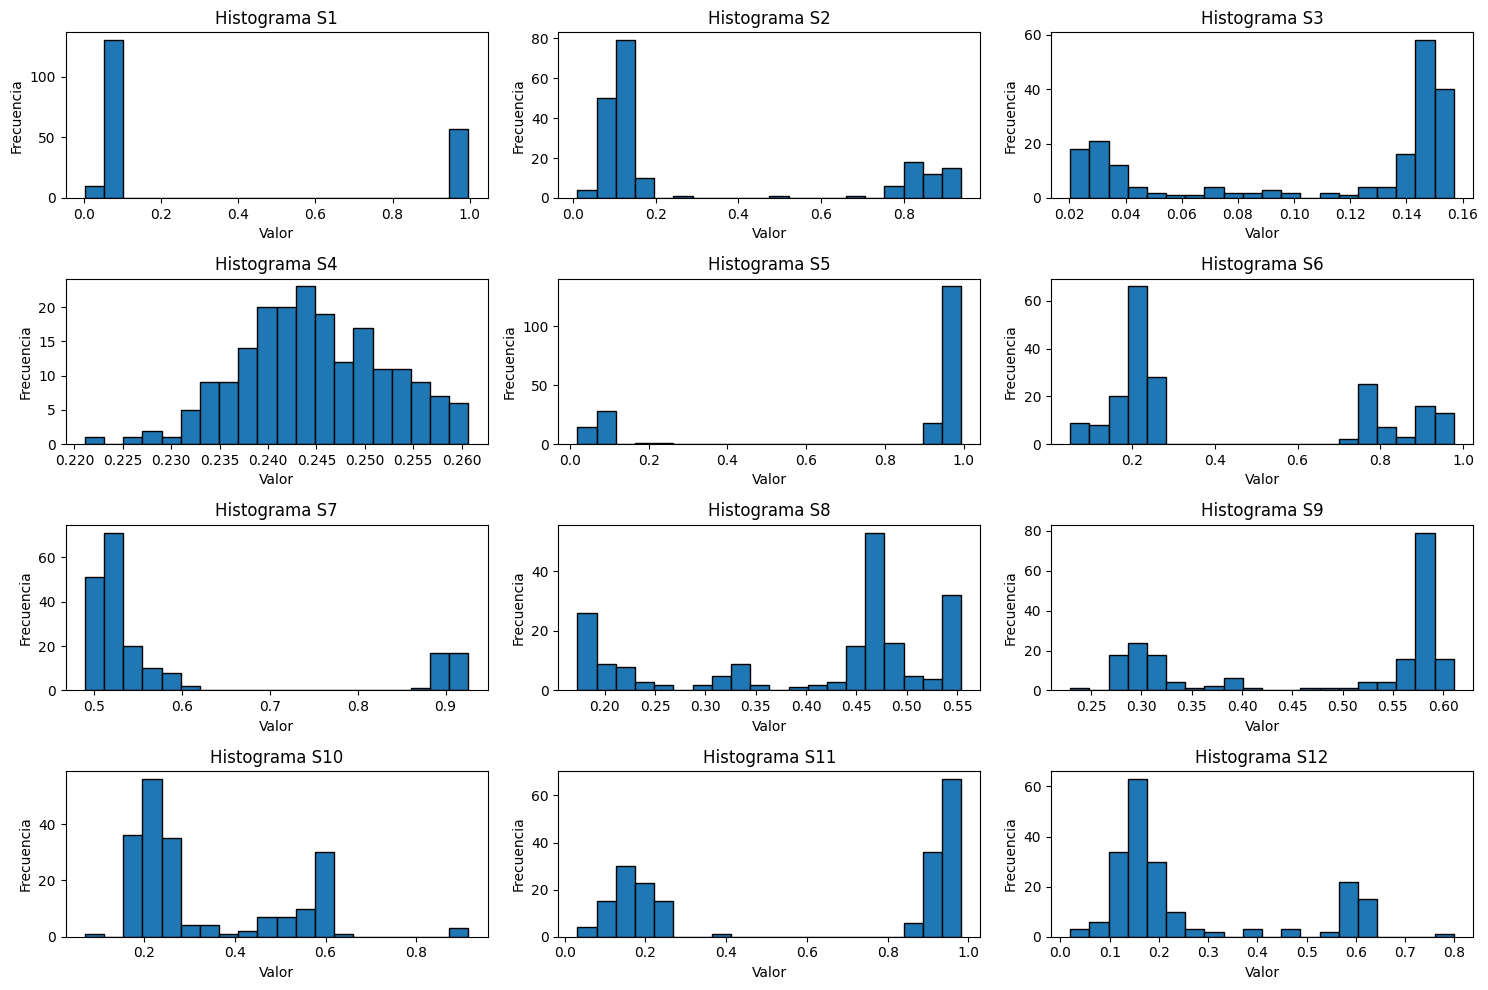

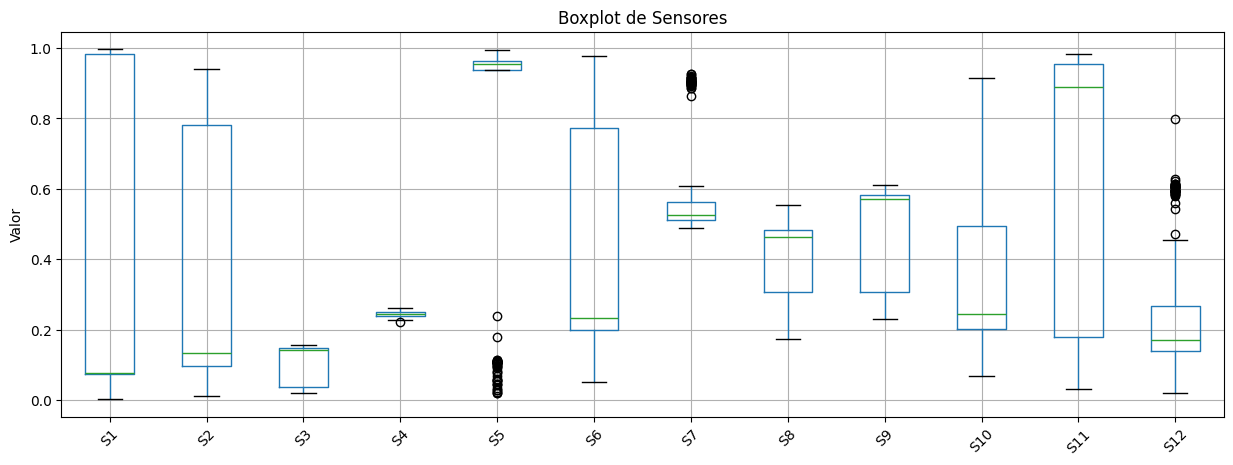

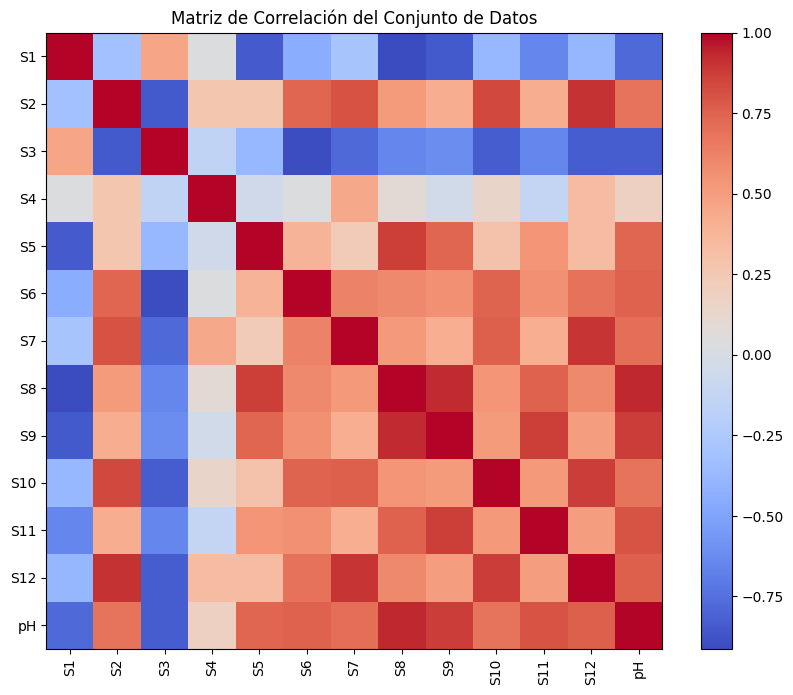

In [186]:
import matplotlib.pyplot as plt
import numpy as np

print("Estadísticas descriptivas del conjunto de datos:")
print(df.describe())


sensores = [f"S{i}" for i in range(1, 13)]


plt.figure(figsize=(15, 10))
for i, sensor in enumerate(sensores):
    plt.subplot(4, 3, i+1)
    plt.hist(df[sensor], bins=20, edgecolor='k')
    plt.title(f"Histograma {sensor}")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))
df[sensores].boxplot()
plt.title("Boxplot de Sensores")
plt.xticks(rotation=45)
plt.ylabel("Valor")
plt.show()


plt.figure(figsize=(10, 8))
corr = df[sensores + ['pH']].corr()
cax = plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(cax)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriz de Correlación del Conjunto de Datos")
plt.show()

En los histogramas de los 12 sensores se ve que cada sensor posee una distribución distinta. Algunos presentan comportamientos más simétricos, mientras que otros son totalmente asimétricos. Esto me indica que la variabilidad en las mediciones de cada sensor no es uniforme y que podrían existir diferencias en la forma en que cada compuesto reacciona al pH de la solución. Además, se puede intuír la presencia de outliers en estos.

El boxplot de los sensores confirma que existen outliers. Al comparar los rangos entre cuartiles, noto que algunos sensores presentan mayor cantidad de outliers y distrubición, mientras que otros son más consistentes. Será relevante tratar en el preprocesado para evitar que influyan negativamente en los modelos predictivos.

El heatmap en este caso no es tan útil, ya que al tener valores tan altos en los sensores no se puede identificar bien la correlación entre las características, esperaré a después de la normalización.

Por último, la distribución de la variable pH, visualizada mediante un histograma (y complementada con un boxplot), revela que los valores se agrupan en una franja relativamente estrecha. Esto es favorable para los modelos, ya que la variabilidad de la clase no es muy grande, más adelante consideraré si esto es digno para balancearla.

#2.Preprocesasdo de los datos

##2.1 Tratamiento de valores nulos

Antes de proceder con cualquier otro paso del preprocesamiento, es fundamental revisar si existen valores nulos en el conjunto de datos. Esto me ayudará a determinar si es necesario aplicar alguna estrategia de imputación o eliminación de registros. En este caso, se revisa la presencia de valores nulos en cada columna y se visualiza un resumen para confirmar su ausencia o presencia.

Valores nulos en cada columna:
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
pH     0
dtype: int64


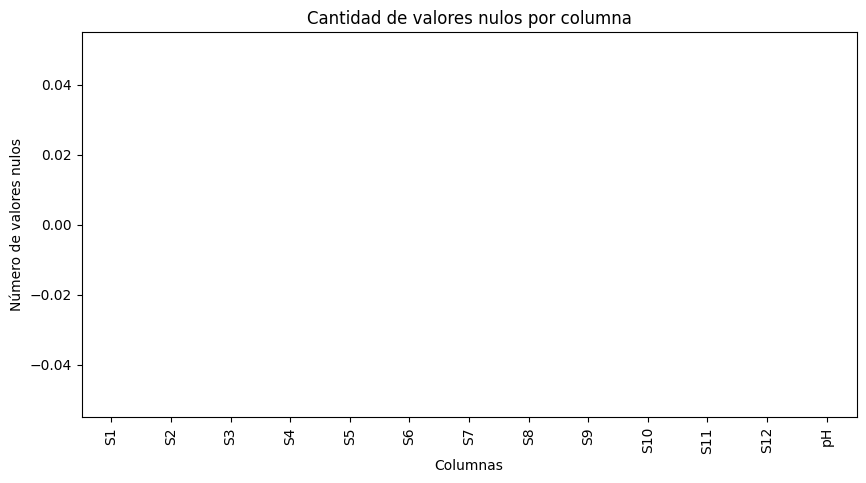

In [187]:
nulos = df.isnull().sum()
print("Valores nulos en cada columna:")
print(nulos)

plt.figure(figsize=(10, 5))
nulos.plot(kind='bar', color='skyblue')
plt.title("Cantidad de valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Número de valores nulos")
plt.show()


Como vemos, al igual que en el anterior problema, no existen valores nulos, por lo que este paso queda terminado aquí, sin necesidad de imputar ningún valor.

##2.2 Detección y tratamiento de outliers

Igual que en el anterior problema, para detectar outliers, calculo el IQR de cada sensor. Considero como outlier aquellos valores que se encuentran por debajo de Q1 - 3 * IQR o por encima de Q3 + 3 * IQR (uso 3 porque si no coge demasiados). Al haber visualizado los resultados con boxplots, puedo confirmar la presencia de dichos valores extremos.

En función de la evaluación, eliminar o atenuar los outliers puede ser beneficioso, ya que estos valores extremos pueden distorsionar el entrenamiento de algunos modelos. Al igual que antes uso la técnica de capado (manteniendo un poco la influencia de los outliers), para no eliminar instancias cuando tenemos tan pocas.

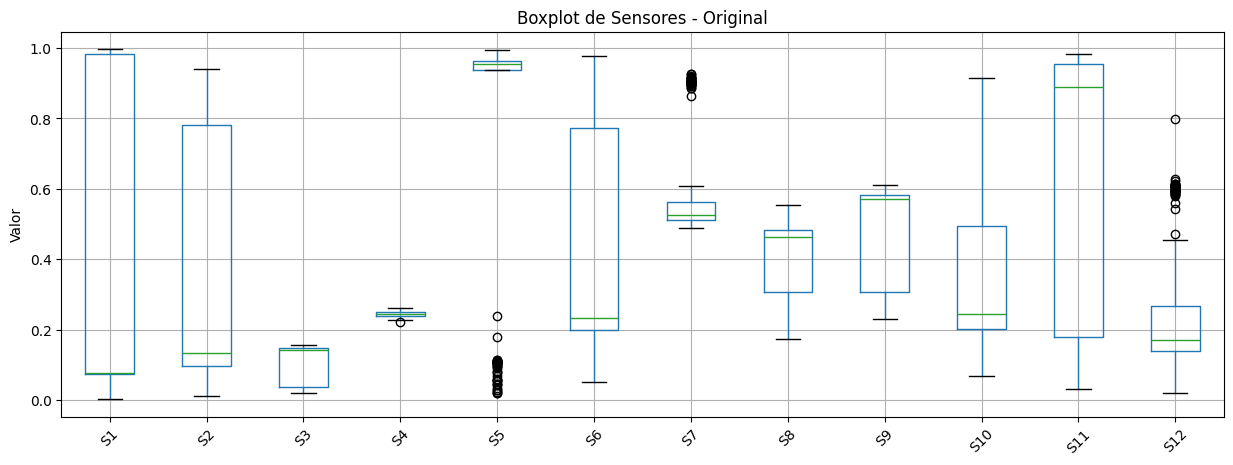

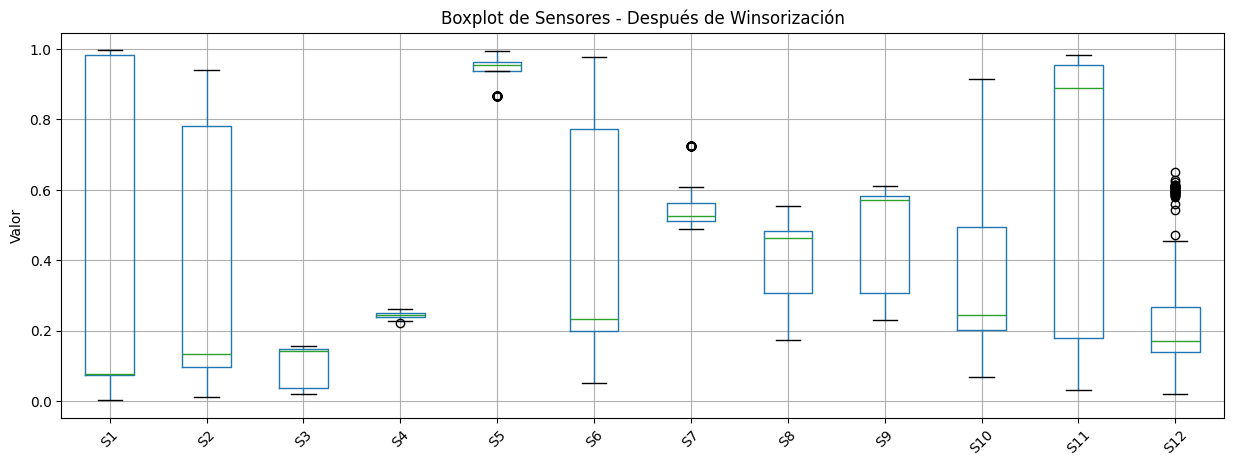

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

sensores = [f"S{i}" for i in range(1, 13)]

def winsorizar_columna(columna, factor=3):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - factor * IQR
    lim_sup = Q3 + factor * IQR
    return columna.clip(lower=lim_inf, upper=lim_sup)
l
df_winsorizado = df.copy()

for sensor in sensores:
    df_winsorizado[sensor] = winsorizar_columna(df_winsorizado[sensor], factor=3)

plt.figure(figsize=(15, 5))
df[sensores].boxplot()
plt.title("Boxplot de Sensores - Original")
plt.xticks(rotation=45)
plt.ylabel("Valor")
plt.show()

plt.figure(figsize=(15, 5))
df_winsorizado[sensores].boxplot()
plt.title("Boxplot de Sensores - Después de Winsorización")
plt.xticks(rotation=45)
plt.ylabel("Valor")
plt.show()


Aplicando el capado en este conjunto de datos tan pequeño, se observa en los boxplots que los valores extremadamente altos o bajos han sido recortados, lo cual reduce la dispersión aparente de la mayoría de los sensores. Sin embargo, no siempre utilizaría esta técnica, porque puede distorsionar los datos, en este caso no observamos una distorsión.

En este contexto, conviene recordar que cada observación es muy valiosa cuando el conjunto de datos es pequeño, por lo que conviene verificar si los outliers eran mediciones legítimas o errores. Si reflejan situaciones reales, la winsorización podría eliminar información potencialmente útil; en cambio, si son producto de fallos experimentales, el recorte puede estabilizar el entrenamiento de los modelos.

En conclusión, la winsorización ayuda a atenuar la influencia de valores extremos y a mejorar la consistencia de las distribuciones, pero se debe evaluar cuidadosamente su impacto en la capacidad del modelo para predecir situaciones extremas. Es aconsejable comparar distintas estrategias (por ejemplo, uso de escaladores robustos o transformaciones logarítmicas) y medir el desempeño final del modelo para determinar si este recorte de outliers resulta beneficioso o si, por el contrario, merma la representatividad de los datos.

##2.3 Normalización de las variables

Este paso suele hacerse más adelante, pero creo conveniente hacerlo ya por los valores en concreto de este conjunto de datos, son demasiado grandes y dispersos, lo que puede afectar a otros pasos del preprocesamiento, por lo que considero que normalizarlos cuanto antes es lo correcto. En este ejemplo, utilizaré la técnica de MinMaxScaler, de modo que los valores estarán comprendidos entre 0 y 1:

Estadísticas descriptivas de los sensores escalados (MinMax):
               S1          S2          S3          S4          S5          S6  \
count  197.000000  197.000000  197.000000  197.000000  197.000000  197.000000   
mean     0.335285    0.323706    0.642316    0.598650    0.561714    0.394024   
std      0.419103    0.351300    0.385387    0.190631    0.315099    0.337198   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.070934    0.093086    0.130062    0.469173    0.569187    0.160831   
50%      0.075446    0.131541    0.899770    0.577320    0.699415    0.197136   
75%      0.986384    0.829265    0.942216    0.731651    0.758916    0.779485   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               S7          S8          S9         S10         S11         S12  
count  197.000000  197.000000  197.000000  197.000000  197.000000  197.000000  
mean     0.300735    0.603855    0.643083    0.3

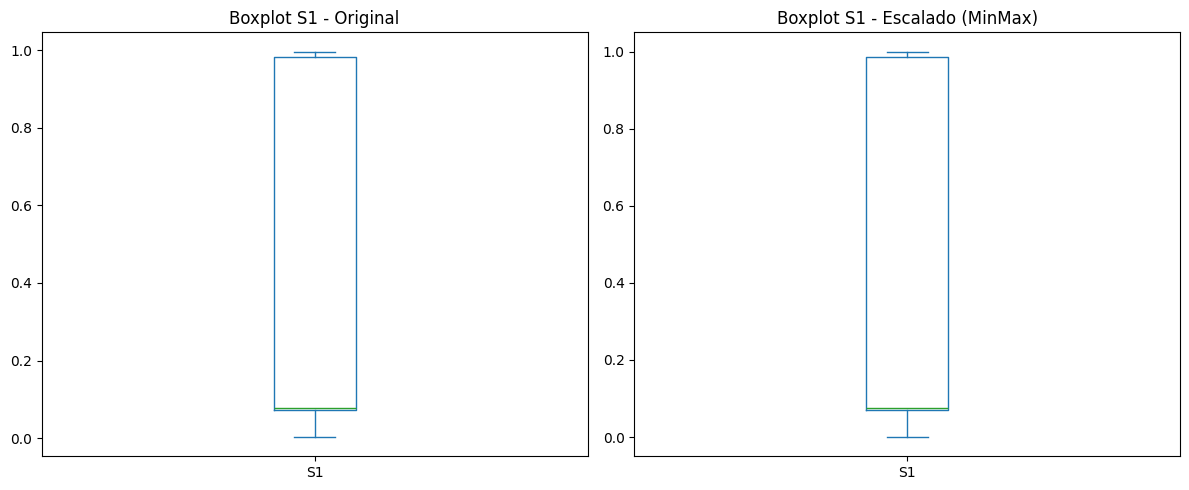

In [189]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

sensores = [f"S{i}" for i in range(1, 13)]

df_scaled = df_winsorizado.copy()

scaler = MinMaxScaler()

df_scaled[sensores] = scaler.fit_transform(df_scaled[sensores])

print("Estadísticas descriptivas de los sensores escalados (MinMax):")
print(df_scaled[sensores].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['S1'].plot(kind='box')
plt.title("Boxplot S1 - Original")

plt.subplot(1, 2, 2)
df_scaled['S1'].plot(kind='box')
plt.title("Boxplot S1 - Escalado (MinMax)")
plt.tight_layout()
plt.show()


Tras usar MinMaxScaler, observamos que en las estadísticas descriptivas, el valor mínimo es 0 y el máximo es 1, lo que confirma que la escala de cada variable se ha homogenizado por completo. Al comparar los boxplots, se aprecia que la distribución conserva, pero ahora todos los valores se encuentran en un mismo intervalo.

Esta normalización es útil para algoritmos sensibles a la magnitud de las variables, ya que evita que un sensor domine el entrenamiento solo por su rango de valores.

##2.4 Selección de características y reducción de dimensionalidad

Para este problema, considero que este apartado también es muy importante, ya que visualizando el conjunto de datos vemos que los valores que tenían las características, al ser tan altos, pueden esconder una alta cohesión o baja variabilidad entre los sensores. He decidido aplicar PCA (Análisis de Componentes Principales) a las 12 variables de sensores (ya tratadas y normalizadas) para determinar cuánta de la variabilidad total del conjunto de datos se explica con un número reducido de componentes. La idea es verificar si, por ejemplo, las primeras 3 o 4 componentes capturan la mayor parte de la varianza. Si es así, podríamos usar estas componentes en lugar de las 12 variables originales, simplificando el modelo y reduciendo la redundancia sin perder información relevante para predecir el pH.

Varianza explicada por componente:
Componente 1: 0.6293
Componente 2: 0.2017
Componente 3: 0.0603
Componente 4: 0.0380
Componente 5: 0.0194
Componente 6: 0.0180
Componente 7: 0.0106
Componente 8: 0.0073
Componente 9: 0.0066
Componente 10: 0.0050
Componente 11: 0.0027
Componente 12: 0.0011


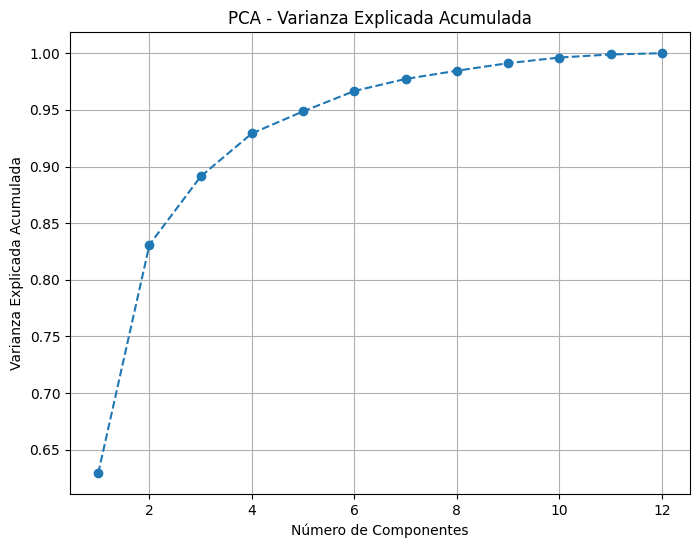

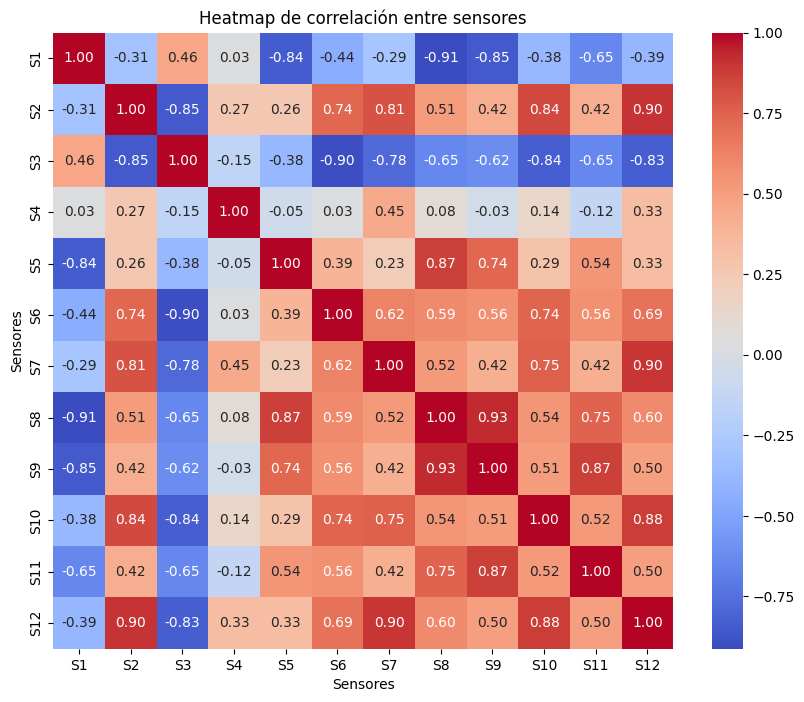

Ranking de sensores según la suma de cargas absolutas en PC1, PC2 y PC3:
S11    1.233243
S1     1.089618
S5     0.968301
S2     0.851830
S7     0.779989
S9     0.779513
S3     0.777433
S8     0.759271
S12    0.693941
S6     0.626461
S4     0.468123
S10    0.348064
dtype: float64


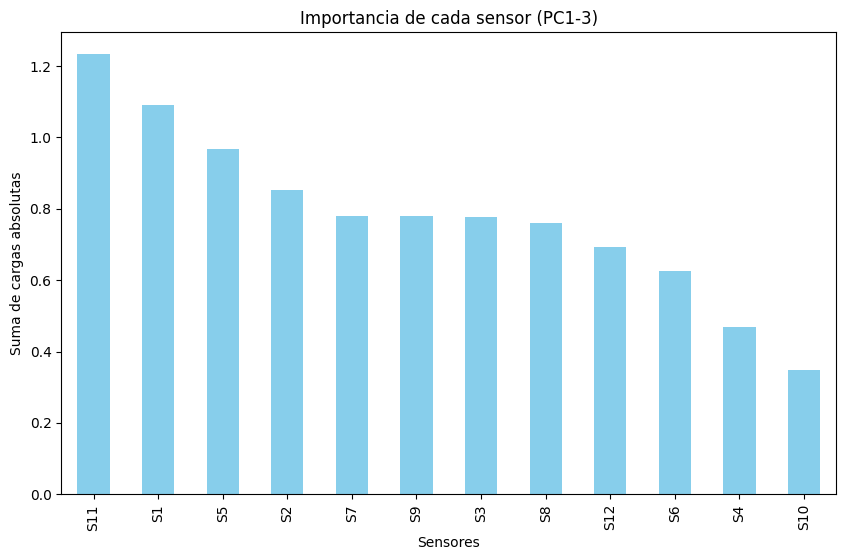

In [190]:
from sklearn.decomposition import PCA

X = df_scaled[sensores]

pca = PCA(n_components=len(sensores))
X_pca = pca.fit_transform(X)

print("Varianza explicada por componente:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {ratio:.4f}")

plt.figure(figsize=(8,6))
plt.plot(range(1, len(sensores)+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA - Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

corr_matrix = df[sensores].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de correlación entre sensores")
plt.xlabel("Sensores")
plt.ylabel("Sensores")
plt.show()

selected_PCs = ['PC1', 'PC2', 'PC3']
loadings_selected = loadings.loc[selected_PCs]

importancia = loadings_selected.abs().sum(axis=0).sort_values(ascending=False)

print("Ranking de sensores según la suma de cargas absolutas en PC1, PC2 y PC3:")
print(importancia)

plt.figure(figsize=(10, 6))
importancia.plot(kind='bar', color='skyblue')
plt.title("Importancia de cada sensor (PC1-3)")
plt.ylabel("Suma de cargas absolutas")
plt.xlabel("Sensores")
plt.show()


Los resultados de la aplicación de PCA muestran que el primer componente principal (PC1) explica aproximadamente el 63% de la varianza total. El segundo componente (PC2) aporta cerca de un 20% adicional, por lo que, en conjunto, las dos primeras componentes capturan más del 80% de la variabilidad. Además, el tercer componente (PC3) añade alrededor de un 7%, alcanzando una varianza acumulada cercana al 90%. Estos resultados son muy importantes, ya que indican que si tuviesemos muchos senroses, podríamos reducirlos.

En el heatmap podemos observar cierta correlación entre las variables, una vez ya hemos tratado outilers y escalado las variables. Aunque esto no es tan importante como el PCA, nos permite de manera simple ver que existe bastante correlación entre muchos de los sensores, lo que nos dá que pensar a la hora de seleccionar las características.

Como estamos ante un conjunto de datos de pocas variables, decidiré usarlas todas, porque no creo que ninguna afecte negativamente ni sobre a la hora de evaluar modelos en este caso. En otros problemas este estudio habría tenido más relevancia, pudiendo reducir la dimensionalidad gracias a este estudio.

##2.5 Balanceo de la clase

Como la clase es continua, es decir numérica, no veo razonable tratar este apartado como en el anterior, ya que cada registro del conjunto de datos tiene un valor distinto de clase.

#3.Definición del protocolo de validación experimental y métricas

Dividiremos el conjunto en dos partes: un 80% para entrenamiento y un 20% para test. Esto nos permitirá ajustar el modelo con la mayor parte de los datos y evaluar su desempeño final en datos que el modelo no ha visto. Además, usaremos las siguientes métricas para evaluar el rendimiento del modelo de regresión:


*   RMSE (Raíz del Error Cuadrático Medio): Mide la magnitud de los errores en las mismas unidades que la variable objetivo, penalizando fuertemente los errores grandes.

*   MAE (Error Absoluto Medio): Calcula el promedio de los errores absolutos, ofreciendo una medida más robusta ante outliers.
*   R² (Coeficiente de Determinación): Indica el porcentaje de varianza de la variable objetivo explicado por el modelo.

El código que divide el conjunto de datos es el siguiente:

In [191]:
from sklearn.model_selection import train_test_split

selected_sensores = [f"S{i}" for i in range(1, 13)]
X = df_scaled[selected_sensores]
y = df_scaled['pH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de test:", X_test.shape)


Tamaño del conjunto de entrenamiento: (157, 12)
Tamaño del conjunto de test: (40, 12)


De esta forma, podemos pasar ya al tema del modelado.

#4.Selección y explicación de los modelos

He decidido seguir la misma dinámica que en el anterior problema, utilizaré un algoritmo básico y muy eficiente como primer algoritmo, que nos permitirá ver su desarrollo y tantear el problema. Luego aplicaré un algoritmo de ensemble, y por último un algoritmo de regresión más complejo.

##4.1 Regresión lineal

He elegido la Regresión Lineal como modelo base por su simplicidad e interpretabilidad. Este método busca establecer una relación lineal entre los sensores (variables de entrada) y la variable objetivo (pH). Con el preprocesado realizado (normalización, tratamiento de outliers y análisis de redundancias), la Regresión Lineal sirve para:


*   Obtener un punto de referencia sobre la complejidad real del problema.
*   Evaluar la importancia de una posible relación lineal entre las mediciones de los sensores y el pH.








##4.2 Random Forest Regressor

Random Forest es un modelo ensemble que combina múltiples árboles de decisión, lo cual mejora la robustez y la precisión. Cada árbol aprende sobre distintas particiones del conjunto de datos y, al promediar sus predicciones, se mitiga el sobreajuste. Dado que nuestro análisis (PCA y heatmap de correlación) sugiere redundancias entre sensores, Random Forest puede:



*   Capturar interacciones complejas entre las variables sin requerir transformaciones explícitas.

*   Manejar mejor la presencia de outliers y variaciones locales.
*   Proporcionar métricas de importancia de cada sensor, ayudando en la interpretación y en la selección de características.


##4.3 Support Vector Regression (SVR)

El SVR, especialmente con un kernel RBF, es adecuado para capturar relaciones no lineales entre los sensores y el pH. Este enfoque resulta interesante cuando las hipótesis de linealidad no son suficientes. Además, su capacidad para regular la complejidad del modelo a través de parámetros como C y ϵ puede ser beneficiosa en un conjunto de datos pequeño. Concretamente, el SVR:


*   Modela interacciones complejas entre los sensores de forma efectiva.

*   Es menos sensible a outliers (tras el preprocesado) que métodos estrictamente lineales.
*   Ofrece un balance controlable entre el error de entrenamiento y la generalización mediante la elección de hiperparámetros.








#5.Selección y estimación de valores para hiperparámetros

##5.1 Regresión lineal

La Regresión Lineal en su forma simple no tiene hiperparámetros a optimizar, por lo que optamos por una versión regularizada como Ridge Regression.
El hiperparámetro clave es alpha, que controla la fuerza de la regularización (penaliza coeficientes grandes).
Una búsqueda en rejilla sobre diferentes valores de alpha me ayudará a identificar el grado óptimo de regularización para evitar el sobreajuste, sobre todo en este conjunto de datos pequeño.

In [192]:
from sklearn.linear_model import Ridge

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

ridge = Ridge()

grid_search_ridge = GridSearchCV(estimator=ridge,
                                 param_grid=param_grid_ridge,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 n_jobs=-1)

grid_search_ridge.fit(X_train, y_train)

print("Ridge Regression:")
print("Mejores parámetros:", grid_search_ridge.best_params_)
print("Mejor MSE en validación:", -grid_search_ridge.best_score_)


Ridge Regression:
Mejores parámetros: {'alpha': 0.1}
Mejor MSE en validación: 0.36742087696956627


El valor óptimo de alpha se determina en base al menor error cuadrático medio (MSE) obtenido en validación cruzada, en este caso vemos que es es 0.1

##5.2 Random Forest Regressor

Random Forest Regressor es un método ensemble que combina múltiples árboles de decisión.
Entre los hiperparámetros más relevantes se encuentran:

n_estimators: Número de árboles en el bosque.

max_depth: Profundidad máxima de cada árbol, para controlar la complejidad.

min_samples_split y min_samples_leaf: Controlan el tamaño mínimo de división y de hoja, ayudando a evitar sobreajuste.

max_features: Número de características a considerar para encontrar la mejor división.
Una búsqueda en rejilla permitirá encontrar la combinación que optimice el rendimiento, medido en términos de MSE.

In [193]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [25, 50, 75],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 3],
    'max_features': ['log2', 'sqrt']
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search_rf_reg = GridSearchCV(estimator=rf_reg,
                                  param_grid=param_grid_rf,
                                  scoring='neg_mean_squared_error',
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=1)

grid_search_rf_reg.fit(X_train, y_train)

print("\nRandom Forest Regressor:")
print("Mejores parámetros:", grid_search_rf_reg.best_params_)
print("Mejor MSE en validación:", -grid_search_rf_reg.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest Regressor:
Mejores parámetros: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor MSE en validación: 0.19566401522013155


La búsqueda exhaustiva de hiperparámetros para Random Forest muestra cómo se puede lograr un buen rendimiento incluso con un número moderado de árboles. La estabilidad en el rendimiento al variar n_estimators sugiere que el modelo ya alcanza un rendimiento óptimo en el rango probado.

Nos quedaremos con la combinación de los mejores hiperparámetros para la evaluación del modelo en el conjunto de test.

##5.3 SVR

SVR es un algoritmo que puede modelar relaciones no lineales mediante el uso de kernels.
Los hiperparámetros clave a optimizar son:

kernel: Tipo de función de transformación (por ejemplo, lineal o RBF).

C: Controla la penalización por error; valores altos ajustan el modelo más de cerca a los datos.

gamma: En el kernel RBF, controla la influencia de cada ejemplo; valores muy altos pueden llevar a sobreajuste.

epsilon: Define la zona en la que los errores no son penalizados, afectando la sensibilidad del modelo.
Una búsqueda en rejilla con validación cruzada permite encontrar la mejor combinación que minimice el MSE.

In [194]:
from sklearn.svm import SVR

param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 5, 10, 20],
    'gamma': ['scale', 0.1, 0.15],
    'epsilon': [0.1, 0.2, 0.5]
}

svr = SVR()

grid_search_svr = GridSearchCV(estimator=svr,
                               param_grid=param_grid_svr,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               n_jobs=-1,
                               verbose=1)

grid_search_svr.fit(X_train, y_train)

print("\nSVR:")
print("Mejores parámetros:", grid_search_svr.best_params_)
print("Mejor MSE en validación:", -grid_search_svr.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits

SVR:
Mejores parámetros: {'C': 5, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mejor MSE en validación: 0.35692690704736263


La búsqueda de hiperparámetros en SVR ayuda a encontrar la combinación de kernel, C, gamma y epsilon que minimice el error en validación cruzada.

En este caso, la usaré en el siguiente apartado de la evaluación de los modelos.


#6.Entrenamiento, estimación y discusión de resultados

##6.1 Regresión Lineal

La evaluación de la Regresión Lineal con el hiperparámetro clave alpha, que controla la penalización sobre los coeficientes, seleccionando el valor óptimo {'alpha': 0.1}, es la siguiente:

Ridge Regression Test Metrics:
RMSE: 0.44931181497556233
MAE: 0.3494905674323981
R^2: 0.9851120709925472


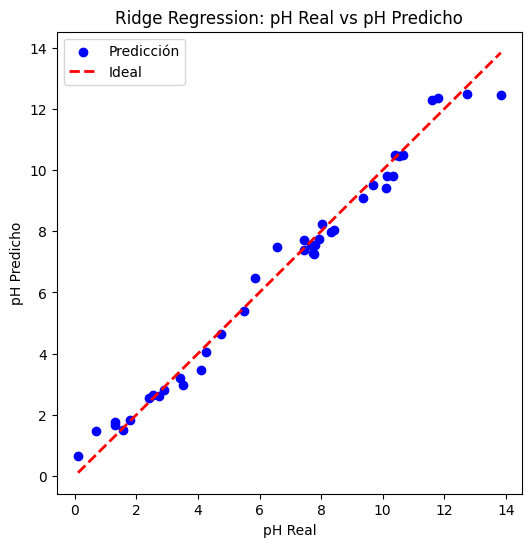

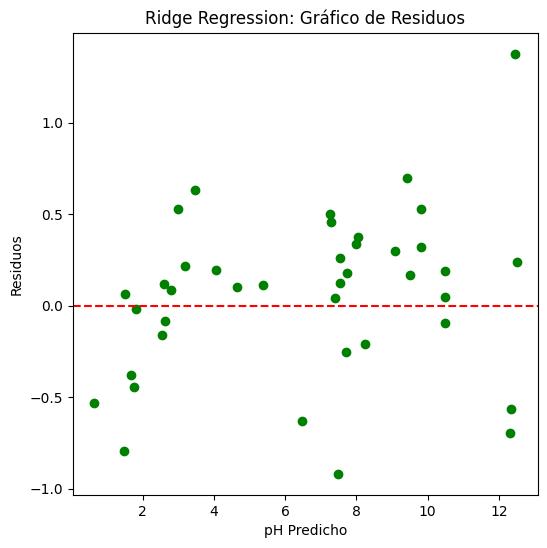

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Test Metrics:")
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)
print("R^2:", r2_ridge)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("pH Real")
plt.ylabel("pH Predicho")
plt.title("Ridge Regression: pH Real vs pH Predicho")
plt.legend()
plt.show()

residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(6,6))
plt.scatter(y_pred_ridge, residuals_ridge, color='green')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("pH Predicho")
plt.ylabel("Residuos")
plt.title("Ridge Regression: Gráfico de Residuos")
plt.show()


Estos resultados obtenidos con la Regresión Lineal utilizando todas las variables (S1 a S12), podemos concluir que el modelo ofrece un rendimiento sobresaliente. El RMSE de aproximadamente 0.45 indica que, en promedio, la predicción del pH se desvía menos de medio punto respecto al valor real, lo que es muy bueno considerando que el pH oscila entre 0 y 14. Además, un MAE cercano a 0.35 confirma que la mayoría de los errores absolutos se encuentran por debajo de 0.5 unidades de pH, y un R² de 0.985 demuestra que el modelo explica prácticamente el 98.5% de la varianza en los valores del pH, evidenciando un rendimiento muy bueno.

Los gráficos de "pH Real vs. pH Predicho" muestran que la mayoría de los puntos se alinean cerca de la línea ideal, lo que respalda lo anterior, mientras que el diagrama de residuos revela una distribución aleatoria alrededor de 0 sin patrones sistemáticos, sugiriendo que el modelo captura adecuadamente la relación sin dejar tendencias sin modelar.

 En conjunto, la combinación de las métricas y la evaluación visual mediante gráficos indican que la Regresión Lineal es capaz de modelar muy bien este problema.

 Al igual que el anterior problema, deberá estar en constante revisión debido al pequño conjunto de datos que se usa, por lo que pueden aparecer nuevos casos muy diversos si fuera una aplicación real del modelo.

##6.2 Random Forest Regressor

Este método de ensemble, a priori, creo que tendrá el mejor desarrollo, por los resultados del MSE en la búsqueda de parámetros, su evaluación es la siguiente:


Random Forest Regressor Test Metrics:
RMSE: 0.3624291014086929
MAE: 0.1967064153673711
R^2: 0.9903131017918217


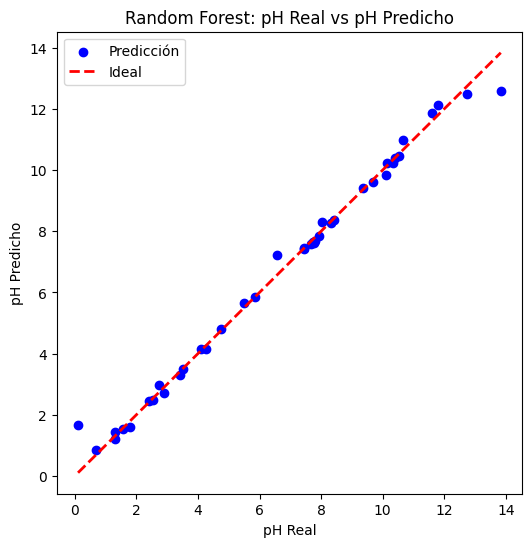

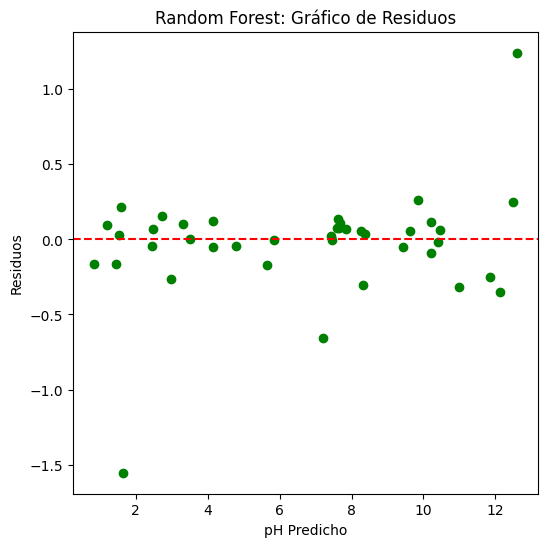

In [196]:
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Test Metrics:")
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R^2:", r2_rf)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("pH Real")
plt.ylabel("pH Predicho")
plt.title("Random Forest: pH Real vs pH Predicho")
plt.legend()
plt.show()

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6,6))
plt.scatter(y_pred_rf, residuals_rf, color='green')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("pH Predicho")
plt.ylabel("Residuos")
plt.title("Random Forest: Gráfico de Residuos")
plt.show()


En este caso, puedo decir que el Random Forest Regressor ha tenido un desempeño casi perfecto. El RMSE cercano a 0.36 indica que, en promedio, el modelo se desvía algo más de un tercio de unidad de pH respecto a los valores reales, y el MAE de aproximadamente 0.20 confirma que la mayoría de los errores absolutos no superan dos décimas de pH. Además, un R² superior al 0.99 evidencia que el modelo explica prácticamente la totalidad de la varianza observada en el pH, lo cual respalda numéricamente la excelente capacidad predictiva de este método.

En el gráfico de “pH Real vs. pH Predicho”, la nube de puntos se alinea muy cerca de la línea ideal, mostrando que las estimaciones se ajustan casi perfectamente a los valores medidos de pH. El diagrama de residuos refuerza este resultado, siendo los errores distribuidos alrededor de cero sin patrones marcados.

Este modelo, pese a ser el más complejo, demuestra un desempeño muy sólido, siendo muy robusto al sobre ajuste, y en mi opinión, para este problema me quedaría con dicho modelo.

##6.3 SVR

En este caso, a priori podemos pensar que no tendrá tan buen rendimiento como el anterior visto, ya que en la búsqueda de los parámetros el MSE no era mejor que dicho algoritmo. La evaluación final sobre el conjunto de test es la siguiente:


SVR Test Metrics:
RMSE: 0.4624061508532329
MAE: 0.34334257674499574
R^2: 0.9842316657883542


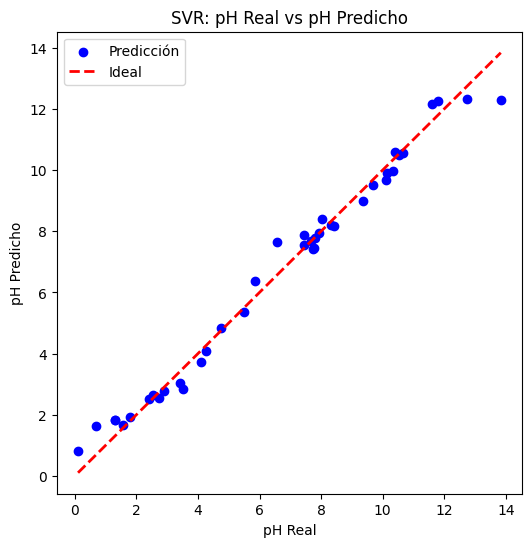

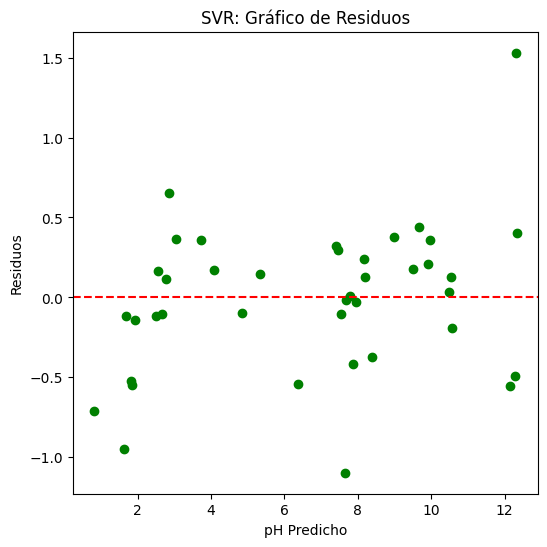

In [197]:
from sklearn.svm import SVR

svr_model = SVR(C=5, epsilon=0.1, gamma='scale', kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSVR Test Metrics:")
print("RMSE:", rmse_svr)
print("MAE:", mae_svr)
print("R^2:", r2_svr)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("pH Real")
plt.ylabel("pH Predicho")
plt.title("SVR: pH Real vs pH Predicho")
plt.legend()
plt.show()

residuals_svr = y_test - y_pred_svr
plt.figure(figsize=(6,6))
plt.scatter(y_pred_svr, residuals_svr, color='green')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("pH Predicho")
plt.ylabel("Residuos")
plt.title("SVR: Gráfico de Residuos")
plt.show()


Al igual que con los dos anteriores, el modelo muestra un desempeño muy bueno en la predicción del pH. El RMSE en torno a 0.46 indica que el error típico ronda casi media unidad de pH, mientras que el MAE, cercano a 0.34, confirma que la mayoría de los errores absolutos permanecen por debajo de 0.5 unidades de pH. Asimismo, un R² superior a 0.98 revela que el SVR logra explicar la mayor parte de la variabilidad del pH, situándose en un rango de ajuste muy elevado.

En el gráfico de “pH Real vs. pH Predicho”, la mayor parte de los puntos se aproxima de forma notable a la línea ideal, demostrando que el SVR reproduce con fidelidad los valores medidos de pH. El diagrama de residuos, por su parte, exhibe una dispersión aleatoria en torno a cero, lo que sugiere que no hay tendencias lineales o patrones sistemáticos sin capturar, indicando que el modelo aprovecha muy bien la información de los sensores.

En este caso, tiene un rendimiento un poco peor que el anterior modelo, pero también es menos complejo, por lo que dependerá siempre del problema cuál de los dos usar, pero en este caso me quedaría con el anterior.

#Conclusión

En este problema vemos que los algoritmos han tenido un desempeño muy bueno en la predicción del PH. Tanto la Regresión Lineal como el SVR tienen un desempeño parecido, por lo que si hablamos de un problema como este donde podemos cometer cierto error, me quedaría con la Regresión Lineal, siendo un modelo mucho más sencillo que nos permitirá ajustarlo y manternerlo de manera mucho más sencilla.
En cuanto al Random Forest Regressor tiene un desempeño casi perfecto, si necesitasemos una predicción lo más exacta posible, sin duda es el candidato, siempre teniendo en cuenta su complejidad a la hora de escarlarlo.

#Bibliografía



*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://www.youtube.com/watch?v=g1yGX_ouHAw (me ayudó a entender mejor el SVR)

